<h1><center><b>User Manual: Landslide-Tsurrogate v1.0</b></center></h1>

<font size=4>
    
<b>Authors:</b> Clea L. Denamiel, Alexis Marboeuf, Anne Mangeney  

<b>Version:</b> v1.0

<b>Publication Year:</b> 2025

<b>DOI:</b>

</font>

----------------------------------------------------------

## INTRODUCTION
------------

In the last decade, **surrogate model approaches**—providing fast-running approximations of complex dynamical models—have been gaining traction in the geoscience community (e.g., Formaggia et al., 2013; Wang et al., 2016; Sraj et al., 2014; Giraldi et al., 2017). Compared to sampling approaches (e.g., Monte Carlo simulations), surrogate models are **highly efficient for uncertainty quantification** and, once trained for a given location, can be used **without additional computational resources** (Knio and Le Maître, 2006; Najm et al., 2009). Moreover, as surrogate models are driven by information needs and their **training is relatively inexpensive**, they require **limited computational and observational resources**. For example, surrogate models can be built with limited knowledge of the uncertain parameter prior distributions (e.g., **uniform distributions** can be used when observations are scarce), and a **scarse sampling** of these distributions (e.g., **sparse grids**)—compared to Monte Carlo simulations—can be used to minimize the training dataset.

Consequently, **surrogate models** can be seen as a **natural solution for Probabilistic Tsunami Hazard Assessment (PTHA)** in regions of the world where observational data and modeling capacities are lacking. In this context, surrogate models propagate the uncertainties associated with tsunami sources (seismic, volcanic, landslide, or atmospheric) to assess the probability of scenario distributions exceeding defined tsunami hazard metrics.

The following **Jupyter Notebook** serves as the **User Manual** for the **Landslide-Tsurrogate v1.0 model (REFERENCE_ARTICLE)** and documents the various steps (along with code) used to build surrogate models for **tsunamis generated by landslides**. The surrogate model construction is illustrated using the **Mayotte** (France, Fig. 1) test case. For more details about the mathematical framework, the Mayotte test case, and the literature related to landslide-tsunamis, please refer to **REFERENCE_ARTICLE**. Throughout the document, the symbol ***<font color='green'>@user</font>*** indicates that the user should perform an action.

![Mayotte_Location](figures/JN_UM_figure_1.jpg)

**Figure 1.** Geographycal location of Mayotte (France)

**Mayotte** is a **volcanic area** located in the Indian Ocean, composed of the **islands of Petite Terre and Grande Terre** that are surrounded by a well-developed shallow submarine shelf forming a lagoon (Fig. 1). Following the intense **seismo-volcanic crisis in 2018** (Mercury et al., 2022), preliminary assessments have identified **Mayotte** as an area where **submarine landslides** could generate **catastrophic tsunami waves** (Feuillet et al., 2021; Roger, 2019; Poulain et al., 2022; Marboeuf et al., 2025). In particular, **landslides** occurring in the **Piton area** (Fig. 1) have the potential to pose a **serious threat** to the **local population and infrastructure** (Poulain et al., 2022; Lemoine et al., 2020b), as they could generate submarine landslide **tsunamis** characterized by (i) **rapid arrival time**, (ii) relatively **large wave amplitudes**, and (iii) **lack of forewarning** (Roger et al., 2024).

The use of **Landslide-Tsurrogate v1.0 (REFERENCE_ARTICLE)** in **Mayotte** is thus designed to provide a **faster-than-real-time forecast** of tsunami waves in the event of a **detected landslide** in the **Piton area**. As no landslide-tsunami events have yet been observed in this region, the surrogate models are **entirely based on deterministic numerical model results**. However, because landslide-tsunami models are computationally demanding, a **computationally inexpensive stochastic surrogate model strategy**—based on the **generalized Polynomial Chaos Expansion** (**gPCE**; Xiu and Karniadakis, 2002a,b, 2003; Soize and Ghanem, 2004)—is employed to forecast tsunamis generated by landslides. The main advantage of this approach is that it enables efficient **uncertainty propagation**, as moments and sensitivity indices can be directly extracted from the coefficients of the **gPCE decomposition**. The validity of using a surrogate model in this context is based on the assumption (Ernst et al., 2012) that a **full gPCE** for maximum elevation, maximum speed, and time of arrival of tsunami waves **converges** (i.e., the **mean-square error** between gPCE results and deterministic simulations tends to zero as the expansion becomes infinite). This assumption has **already been validated** for tsunami hazards generated by **atmospheric sources in the Adriatic Sea** (Denamiel et al., 2019, 2020, 2021).

The construction of surrogate models with **Landslide-Tsurrogate v1.0** follows **7 steps** which are described in detail in this **User Manual**:

**STEP 1**: Definition of the stochastic variables, mathematical framework and sampling functions 

**STEP 2**: Creation of the parameters for the deterministic simulations

**STEP 3**: Running the deterministic simulations

**STEP 4**: Formating the deterministic simulation outputs 

**STEP 5**: Creating the surrogate models

**STEP 6**: Evaluating the surrogate model convergence, performance and sensitivity 

**STEP 7**: Operating the user-friendly interface


----------------------------------------------------------
## STEP 1: DEFINITION OF THE STOCHASTIC VARIABLES, MATHEMATICAL FRAMEWORK & SAMPLING FUNCTIONS 
----------------------------------------------------------

### 1) STOCHASTIC VARIABLES & MATHEMATICAL FRAMEWORK

After several tests, the optimal configuration of the surrogate models was determine to include **3 stochastic variables**: 

- **Location of the landslide**

To minimize the number of stochastic variables, landslide locations are defined using only latitude (y) or longitude (x) values along isolines of the steepest slope in the Piton area, where landslides are considered most likely to occur (Fig. 2). The other coordinate is obtained by interpolating along the selected isolines of highest slope. Surrogate models have been constructed along **three distinct isolines** of steepest slope: **Piton South**, **Piton North**, and **Piton Offshore** (Fig. 2).

<center><img src="figures/JN_UM_figure_2.jpg"/></center>
<center><b>Figure 2.</b> Locations along selected isolines of steepest slope in the Piton area with Piton South in blue, Piton North in white and Piton Offshore in orange. </center> 

- **Volume of the landslide**
- **Angle of friction of the landslide**

Due to the limited availability of measurements, the **prior distributions** of the stochastic variables could not be precisely estimated. Therefore, it is assumed that all stochastic variables follow **uniform distribution**s—that is, within the defined range, any landslide scenario is considered equally probable.

- **Piton South**: 

![Distribution_PS_Equation](figures/JN_UM_distributions_PS.jpg)

- **Piton North**:

![Distribution_PN_Equation](figures/JN_UM_distributions_PN.jpg)

- **Piton Offshore**:

![Distribution_PO_Equation](figures/JN_UM_distributions_PO.jpg)

The **gPCE mathematical framework** of the **Landslide-Tsurrogate v1.0** model is based on **polynomial expansions** that decompose into **deterministic coefficients** and random **orthogonal bases**. For the **uniform distributions**, as defined in the Mayotte use case, the appropriate orthogonal bases are **Legendre polynomials** (note: if other distributions are used, different types of orthogonal polynomials should be selected accordingly).

The **deterministic coefficients**—which represent the projection of tsunami maximum elevation, maximum speed, and time of arrival onto each polynomial basis—are computed using a **quadrature-based approximation** derived from **deterministic numerical simulations**. These simulations are defined by sampling the parameter intervals described above, and the number of required samples depends on the chosen **maximum polynomial degree of the Legendre polynomials** and the **quadrature rule chosen**.

The **higher the polynomial degree**, the **greater the number of samples**, and thus, the **larger the number of deterministic simulations** that must be performed. For the **Mayotte surrogate models**, the **maximum polynomial degree or total order** used is **6**.

Below are the parameters used in **Landslide-Tsurrogate v1.0** to create the surrogate models in **Mayotte**. These parameters should **not be modified** unless the user intends to run deterministic landslide-tsunami simulations for a different study case.

***<font color='green'>@user Run the cell below in order to create the variables used for the Mayotte Piton South, North and Offshore surrogate models</font>***

In [1]:
"""
--------------------------
Landslide-Tsurrogate v1.0
--------------------------

Main program: Landslide_Tsurrogate_user_input
------------

This program allows the user to define both the stochastic variables 
(number, type, distributions) and the maximum total degree of the 
decomposition tailored for their own application in a specific region.

"""

#------------------------------------------------------------------
# Number of stochastic variables used to build the surrogate models
#------------------------------------------------------------------

nmodes = 3

#---------------------------------------------------
# Interval of definition of the stochastic variables
#---------------------------------------------------

# --- Piton South ---

# uniforme distribution of location in latitude defined in the interval [as_y,bs_y]
as_y = 8584345.32
bs_y = 8589024.15
# uniforme distribution of volume defined in the interval [as_v,bs_v]
as_v = 1.0
bs_v = 200.0
# uniforme distribution of angle of friction defined in the interval [as_f,bs_f]
as_f = 4.0
bs_f = 12.0

# --- Piton North ---

# uniforme distribution of location in latitude defined in the interval [an_y,bn_y]
an_y = 8589024.17
bn_y = 8589586.88
# uniforme distribution of volume defined in the interval [an_v,bn_v]
an_v = 1.0
bn_v = 200.0
# uniforme distribution of angle of friction defined in the interval [an_f,bn_f]
an_f = 4.0
bn_f = 12.0

# --- Piton Offshore ---

# uniforme distribution of location in longitude defined in the interval [ao_x,bo_x]
ao_x = 534200.00
bo_x = 534800.00
# uniforme distribution of volume defined in the interval [ao_v,bo_v]
ao_v = 1.0
bo_v = 200.0
# uniforme distribution of angle of friction defined in the interval [ao_f,bo_f]
ao_f = 4.0
bo_f = 12.0

#--------------------------------------------------------------------
# Maximum total order of the Legendre polynomials that will be tested
#--------------------------------------------------------------------

maxdeg = 6

#------------
# User output
#------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------")
print("The uniform distributions of the stochastic variables used to create the Mayotte Piton South, North and Offshore surrogate models are now defined")
print("--------------------------------------------------------------------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------------------------------------------------------------------
The uniform distributions of the stochastic variables used to create the Mayotte Piton South, North and Offshore surrogate models are now defined
--------------------------------------------------------------------------------------------------------------------------------------------------


The **first step** of generating **surrogate models** based on gPCE is now **completed**.

### 2) SAMPLING FUNCTIONS

Before proceeding to STEP 1, it is important for the user to become familiar with the functions used in **Landslide-Tsurrogate v1.0** to sample the uniform distributions. The Mayotte test case follows the recommanded settings of Landslide-Tsurrogate v1.0 and the **Gauss–Patterson delayed sparse nested grid rules** (Patterson, 1968; Holtz, 2011) are employed. These rules maintain **high precision in the computation of deterministic coefficients** while significantly **reducing the number of stochastic variable values** required for quadrature, compared to traditional rules. As a result, they **optimize the number of deterministic simulations** and thereby **lower the numerical cost** of building the surrogate models.

The **functions below** constitute the core building blocks used to sample the intervals, following the Gauss–Patterson delayed sparse nested grid rules.

***<font color='green'>@user Have a look at the functions and test them to understand how they work</font>***

*******************************************
**Gauss Patterson 1 dimensionnal nested rule**
*******************************************

**Quadrature rules** are used to find the **best approximation** to **integrate** quantities. The **Gauss–Patterson quadrature** is a nested family that begins with the **Gauss–Legendre rules of levels 0 and 1**, and then successively inserts**one new point or abscissa into each subinterval**. Consequently, beyond the second rule, the Gauss–Patterson rules **do not retain the ultra-high precision of the original Gauss–Legendre rules**. Instead, they trade this precision for the **advantage of nestedness**.

**Practically**, this means that **all deterministic simulations** required at a given **level n** are **also used at level n+1**. As a result, **surrogate models** can be progressively **upgraded over time**, which is especially beneficial if the user lacks the numerical resources to run all high-order simulations at once.

However, the Gauss–Patterson rules are **only available** for levels **0 to 8** corresponding to the **number of points** (or abscissa) **1, 3, 7, 15, 31, 63, 127, 255, or 511**.

The **Gauss–Patterson quadrature** is based on the following literature:

- Prem Kythe, Michael Schaeferkotter, Handbook of Computational Methods for Integration, Chapman and Hall, 2004,ISBN: 1-58488-428-2, LC: QA299.3.K98.
- Thomas Patterson, The Optimal Addition of Points to Quadrature Formulae,Mathematics of Computation,Volume 22, Number 104, October 1968, pages 847-856.

**Discussion**: Let's assume an integration interval **[-1, 1]** and a weight function **w(x)=1.0** with **Integral (-1 <=x<= 1) F(x) dx** the integral to approximate. The quadrature rule is: **Sum (1 <= I <= N) W(I) * F(x(I))**. For the **Gauss-Patterson rule**, the **level 0** rule containing **1 absciss** is the standard **Gauss-Legendre rule** and the **level 1** rule containing **3 abscissa** is also the standard **Gauss-Legendre rule**. The **level 2** rule containing **7 abscissa** **includes** the abscissas of the **previous rule** and each **subsequent rule** is **nested in a similar way**.  

***<font color='green'>@user Check the function below and run the cell to upload it in the notebook</font>***

In [2]:
def gauss_patterson_nested_rule_1d(n, a, b):
    """
    :param n: Number of points (must be 1, 3, 7, 15, 31, 63, 127, 255 or 511)
    :param a: Lower bound of interval
    :param b: Upper bound of interval
    :return: (zj(n), wj(n)) 
    """
    
    gp_data = {
        1: (np.array([0.0]), np.array([2.0])),
        3: (np.array([-0.774596669241483, 0.0, 0.774596669241483]),
            np.array([0.555555555555556, 0.888888888888889, 0.555555555555556])),
        7: (np.array([-0.96049126870802, -0.77459666924148, -0.43424374934680,
                      0.0,
                      0.43424374934680, 0.77459666924148, 0.96049126870802]),
            np.array([0.10465622602647, 0.26848808986833, 0.40139741477596,
                      0.45091653865847,
                      0.40139741477596, 0.26848808986833, 0.10465622602647])),
        15: (np.array([-0.99383196321276, -0.96049126870802, -0.88845923287226,
                       -0.77459666924148, -0.62110294673723, -0.43424374934680,
                       -0.22338668642897, 0.0, 0.22338668642897, 0.43424374934680,
                       0.62110294673723, 0.77459666924148, 0.88845923287226,
                       0.96049126870802, 0.99383196321276]),
              np.array([0.01700171962994, 0.05160328299708, 0.09292719531512,
                        0.13441525524378, 0.17151190913639, 0.20062852937699,
                        0.21915685840159, 0.22551049979821, 0.21915685840159,
                        0.20062852937699, 0.17151190913639, 0.13441525524378,
                        0.09292719531512, 0.05160328299708, 0.01700171962994])),
        31: (np.array([-0.9990981249676676, -0.993831963212755, -0.9815311495537401, 
                       -0.9604912687080203, -0.9296548574297401, -0.888459232872257, 
                       -0.8367259381688687, -0.7745966692414834,-0.7024962064915271, 
                       -0.6211029467372264, -0.5313197436443756, -0.4342437493468026,
                       -0.33113539325797683, -0.22338668642896688, -0.11248894313318663, 
                       0.0, 
                       0.11248894313318663, 0.22338668642896688, 0.33113539325797683, 
                       0.4342437493468026, 0.5313197436443756, 0.6211029467372264, 
                       0.7024962064915271, 0.7745966692414834, 0.8367259381688687, 
                       0.888459232872257, 0.9296548574297401, 0.9604912687080203,
                       0.9815311495537401, 0.993831963212755, 0.9990981249676676]),
             np.array([0.0025447807915618744, 0.008434565739321106, 0.01644604985438781, 
                        0.025807598096176653, 0.03595710330712932, 0.046462893261757986, 
                        0.05697950949412336, 0.0672077542959907, 0.07687962049900353,
                        0.08575592004999035, 0.09362710998126447, 0.10031427861179558,
                        0.10566989358023481, 0.10957842105592464, 0.11195687302095346, 
                        0.11275525672076869, 
                        0.11195687302095346, 0.10957842105592464, 0.10566989358023481, 
                        0.10031427861179558, 0.09362710998126447, 0.08575592004999035, 
                        0.07687962049900353, 0.0672077542959907,0.05697950949412336, 
                        0.046462893261757986, 0.03595710330712932, 0.025807598096176653, 
                        0.01644604985438781, 0.008434565739321106, 0.0025447807915618744])),
        63: (np.array([-0.9998728881203576, -0.9990981249676676, -0.997206259372222, 
                       -0.993831963212755, -0.9886847575474295, -0.9815311495537401, 
                       -0.9721828747485818, -0.9604912687080203, -0.9463428583734029, 
                       -0.9296548574297401, -0.9103711569570043, -0.888459232872257,
                       -0.8639079381936905, -0.8367259381688687, -0.8069405319502176,
                       -0.7745966692414834, -0.7397560443526948, -0.7024962064915271, 
                       -0.6629096600247806, -0.6211029467372264, -0.5771957100520458, 
                       -0.5313197436443756, -0.48361802694584103, -0.4342437493468026,
                       -0.38335932419873035, -0.33113539325797683, -0.2777498220218243, 
                       -0.22338668642896688, -0.16823525155220747, -0.11248894313318663, 
                       -0.05634431304659279, 0.0, 0.05634431304659279, 
                       0.11248894313318663, 0.16823525155220747, 0.22338668642896688, 
                       0.2777498220218243, 0.33113539325797683, 0.38335932419873035, 
                       0.4342437493468026, 0.48361802694584103, 0.5313197436443756, 
                       0.5771957100520458, 0.6211029467372264, 0.6629096600247806, 
                       0.7024962064915271, 0.7397560443526948, 0.7745966692414834, 
                       0.8069405319502176, 0.8367259381688687, 0.8639079381936905, 
                       0.888459232872257, 0.9103711569570043, 0.9296548574297401, 
                       0.9463428583734029, 0.9604912687080203, 0.9721828747485818, 
                       0.9815311495537401, 0.9886847575474295, 0.993831963212755,
                       0.997206259372222, 0.9990981249676676, 0.9998728881203576]),
             np.array([0.00036322148184553066, 0.001265156556230068, 0.002579049794685688,
                       0.004217630441558855, 0.006115506822117246, 0.00822300795723593,
                       0.010498246909621322, 0.012903800100351266, 0.015406750466559498,
                       0.01797855156812827, 0.02059423391591271, 0.02323144663991027,
                       0.025869679327214747, 0.02848975474583355, 0.031073551111687965,
                       0.03360387714820773, 0.03606443278078257, 0.03843981024945553,
                       0.04071551011694432, 0.042877960025007735, 0.0449145316536322,
                       0.04681355499062801, 0.0485643304066732, 0.05015713930589954,
                       0.05158325395204846, 0.05283494679011652, 0.053905499335266064,
                       0.05478921052796287, 0.05548140435655936, 0.05597843651047632,
                       0.0562776998312543, 0.05637762836038472, 0.0562776998312543, 
                       0.05597843651047632, 0.05548140435655936, 0.05478921052796287, 
                       0.053905499335266064, 0.05283494679011652, 0.05158325395204846, 
                       0.05015713930589954, 0.0485643304066732, 0.04681355499062801, 
                       0.0449145316536322, 0.042877960025007735, 0.04071551011694432, 
                       0.03843981024945553, 0.03606443278078257, 0.03360387714820773, 
                       0.031073551111687965, 0.02848975474583355, 0.025869679327214747, 
                       0.02323144663991027, 0.02059423391591271, 0.01797855156812827, 
                       0.015406750466559498, 0.012903800100351266, 0.010498246909621322, 
                       0.00822300795723593, 0.006115506822117246, 0.004217630441558855, 
                       0.002579049794685688, 0.001265156556230068, 0.00036322148184553066])),
        127: (np.array([-0.99998243035489159858, -0.99987288812035761194, -0.99959879967191068325,
                        -0.99909812496766759766, -0.99831663531840739253, -0.99720625937222195908,
                        -0.99572410469840718851, -0.99383196321275502221, -0.99149572117810613240,
                        -0.98868475754742947994, -0.98537149959852037111, -0.98153114955374010687,
                        -0.97714151463970571416, -0.97218287474858179658, -0.96663785155841656709,
                        -0.96049126870802028342, -0.95373000642576113641, -0.94634285837340290515,
                        -0.93832039777959288365, -0.92965485742974005667, -0.92034002547001242073,
                        -0.91037115695700429250, -0.89974489977694003664, -0.88845923287225699889,
                        -0.87651341448470526974, -0.86390793819369047715, -0.85064449476835027976,
                        -0.83672593816886873550, -0.82215625436498040737, -0.80694053195021761186,
                        -0.79108493379984836143, -0.77459666924148337704, -0.75748396638051363793,
                        -0.73975604435269475868, -0.72142308537009891548, -0.70249620649152707861,
                        -0.68298743109107922809, -0.66290966002478059546, -0.64227664250975951377,
                        -0.62110294673722640294, -0.59940393024224289297, -0.57719571005204581484,
                        -0.55449513263193254887, -0.53131974364437562397, -0.50768775753371660215,
                        -0.48361802694584102756, -0.45913001198983233287, -0.43424374934680255800,
                        -0.40897982122988867241, -0.38335932419873034692, -0.35740383783153215238,
                        -0.33113539325797683309, -0.30457644155671404334, -0.27774982202182431507,
                        -0.25067873030348317661, -0.22338668642896688163, -0.19589750271110015392,
                        -0.16823525155220746498, -0.14042423315256017459, -0.11248894313318662575,
                        -0.084454040083710883710, -0.056344313046592789972, -0.028184648949745694339,
                        0.0, 
                        0.028184648949745694339, 0.056344313046592789972, 0.084454040083710883710,
                        0.11248894313318662575, 0.14042423315256017459, 0.16823525155220746498,
                        0.19589750271110015392, 0.22338668642896688163, 0.25067873030348317661,
                        0.27774982202182431507, 0.30457644155671404334, 0.33113539325797683309,
                        0.35740383783153215238, 0.38335932419873034692, 0.40897982122988867241,
                        0.43424374934680255800, 0.45913001198983233287, 0.48361802694584102756,
                        0.50768775753371660215, 0.53131974364437562397, 0.55449513263193254887,
                        0.57719571005204581484, 0.59940393024224289297, 0.62110294673722640294,
                        0.64227664250975951377, 0.66290966002478059546, 0.68298743109107922809,
                        0.70249620649152707861, 0.72142308537009891548, 0.73975604435269475868,
                        0.75748396638051363793, 0.77459666924148337704, 0.79108493379984836143,
                        0.80694053195021761186, 0.82215625436498040737, 0.83672593816886873550,
                        0.85064449476835027976, 0.86390793819369047715, 0.87651341448470526974,
                        0.88845923287225699889, 0.89974489977694003664, 0.91037115695700429250,
                        0.92034002547001242073, 0.92965485742974005667, 0.93832039777959288365,
                        0.94634285837340290515, 0.95373000642576113641, 0.96049126870802028342,
                        0.96663785155841656709, 0.97218287474858179658, 0.97714151463970571416,
                        0.98153114955374010687, 0.98537149959852037111, 0.98868475754742947994,
                        0.99149572117810613240, 0.99383196321275502221, 0.99572410469840718851,
                        0.99720625937222195908, 0.99831663531840739253, 0.99909812496766759766,
                        0.99959879967191068325, 0.99987288812035761194, 0.99998243035489159858]),
              np.array([0.0000505360952078625176247, 0.000180739564445388357820, 0.000377746646326984660274,
                        0.000632607319362633544219, 0.000938369848542381500794, 0.00128952408261041739210,
                        0.00168114286542146990631, 0.00210881524572663287933, 0.00256876494379402037313,
                        0.00305775341017553113613, 0.00357289278351729964938, 0.00411150397865469304717,
                        0.00467105037211432174741, 0.00524912345480885912513, 0.00584344987583563950756,
                        0.00645190005017573692280, 0.00707248999543355546805, 0.00770337523327974184817,
                        0.00834283875396815770558, 0.00898927578406413572328, 0.00964117772970253669530,
                        0.0102971169579563555237, 0.0109557333878379016480, 0.0116157233199551347270,
                        0.0122758305600827700870, 0.0129348396636073734547, 0.0135915710097655467896,
                        0.0142448773729167743063, 0.0148936416648151820348, 0.0155367755558439824399,
                        0.0161732187295777199419, 0.0168019385741038652709, 0.0174219301594641737472,
                        0.0180322163903912863201, 0.0186318482561387901863, 0.0192199051247277660193,
                        0.0197954950480974994880, 0.0203577550584721594669, 0.0209058514458120238522,
                        0.0214389800125038672465, 0.0219563663053178249393, 0.0224572658268160987071,
                        0.0229409642293877487608, 0.0234067774953140062013, 0.0238540521060385400804,
                        0.0242821652033365993580, 0.0246905247444876769091, 0.0250785696529497687068,
                        0.0254457699654647658126, 0.0257916269760242293884, 0.0261156733767060976805,
                        0.0264174733950582599310, 0.0266966229274503599062, 0.0269527496676330319634,
                        0.0271855132296247918192, 0.0273946052639814325161, 0.0275797495664818730349,
                        0.0277407021782796819939, 0.0278772514766137016085, 0.0279892182552381597038,
                        0.0280764557938172466068, 0.0281388499156271506363, 0.0281763190330166021307,
                        0.0281888141801923586938,
                        0.0281763190330166021307, 0.0281388499156271506363, 0.0280764557938172466068,
                        0.0279892182552381597038, 0.0278772514766137016085, 0.0277407021782796819939,
                        0.0275797495664818730349, 0.0273946052639814325161, 0.0271855132296247918192,
                        0.0269527496676330319634, 0.0266966229274503599062, 0.0264174733950582599310,
                        0.0261156733767060976805, 0.0257916269760242293884, 0.0254457699654647658126,
                        0.0250785696529497687068, 0.0246905247444876769091, 0.0242821652033365993580,
                        0.0238540521060385400804, 0.0234067774953140062013, 0.0229409642293877487608,
                        0.0224572658268160987071, 0.0219563663053178249393, 0.0214389800125038672465,
                        0.0209058514458120238522, 0.0203577550584721594669, 0.0197954950480974994880,
                        0.0192199051247277660193, 0.0186318482561387901863, 0.0180322163903912863201,
                        0.0174219301594641737472, 0.0168019385741038652709, 0.0161732187295777199419,
                        0.0155367755558439824399, 0.0148936416648151820348, 0.0142448773729167743063,
                        0.0135915710097655467896, 0.0129348396636073734547, 0.0122758305600827700870,
                        0.0116157233199551347270, 0.0109557333878379016480, 0.0102971169579563555237,
                        0.00964117772970253669530, 0.00898927578406413572328, 0.00834283875396815770558,
                        0.00770337523327974184817, 0.00707248999543355546805, 0.00645190005017573692280,
                        0.00584344987583563950756, 0.00524912345480885912513, 0.00467105037211432174741,
                        0.00411150397865469304717, 0.00357289278351729964938, 0.00305775341017553113613,
                        0.00256876494379402037313, 0.00210881524572663287933, 0.00168114286542146990631,
                        0.00128952408261041739210, 0.000938369848542381500794,0.000632607319362633544219,
                        0.000377746646326984660274, 0.000180739564445388357820, 0.0000505360952078625176247])),
        255: (np.array([ -0.99999759637974846462, -0.99998243035489159858, -0.99994399620705437576,
                         -0.99987288812035761194, -0.99976049092443204733, -0.99959879967191068325,
                         -0.99938033802502358193, -0.99909812496766759766, -0.99874561446809511470,
                         -0.99831663531840739253, -0.99780535449595727456, -0.99720625937222195908,
                         -0.99651414591489027385, -0.99572410469840718851, -0.99483150280062100052,
                         -0.99383196321275502221, -0.99272134428278861533, -0.99149572117810613240,
                         -0.99015137040077015918, -0.98868475754742947994, -0.98709252795403406719,
                         -0.98537149959852037111, -0.98351865757863272876, -0.98153114955374010687,
                         -0.97940628167086268381, -0.97714151463970571416, -0.97473445975240266776,
                         -0.97218287474858179658, -0.96948465950245923177, -0.96663785155841656709,
                         -0.96364062156981213252, -0.96049126870802028342, -0.95718821610986096274,
                         -0.95373000642576113641, -0.95011529752129487656, -0.94634285837340290515,
                         -0.94241156519108305981, -0.93832039777959288365, -0.93406843615772578800,
                         -0.92965485742974005667, -0.92507893290707565236, -0.92034002547001242073,
                         -0.91543758715576504064, -0.91037115695700429250, -0.90514035881326159519,
                         -0.89974489977694003664, -0.89418456833555902286, -0.88845923287225699889,
                         -0.88256884024734190684, -0.87651341448470526974, -0.87029305554811390585,
                         -0.86390793819369047715, -0.85735831088623215653, -0.85064449476835027976,
                         -0.84376688267270860104, -0.83672593816886873550, -0.82952219463740140018,
                         -0.82215625436498040737, -0.81462878765513741344, -0.80694053195021761186,
                         -0.79909229096084140180, -0.79108493379984836143, -0.78291939411828301639,
                         -0.77459666924148337704, -0.76611781930376009072, -0.75748396638051363793,
                         -0.74869629361693660282, -0.73975604435269475868, -0.73066452124218126133,
                         -0.72142308537009891548, -0.71203315536225203459, -0.70249620649152707861,
                         -0.69281376977911470289, -0.68298743109107922809, -0.67301883023041847920,
                         -0.66290966002478059546, -0.65266166541001749610, -0.64227664250975951377,
                         -0.63175643771119423041, -0.62110294673722640294, -0.61031811371518640016,
                         -0.59940393024224289297, -0.58836243444766254143, -0.57719571005204581484,
                         -0.56590588542365442262, -0.55449513263193254887, -0.54296566649831149049,
                         -0.53131974364437562397, -0.51955966153745702199, -0.50768775753371660215,
                         -0.49570640791876146017, -0.48361802694584102756, -0.47142506587165887693,
                         -0.45913001198983233287, -0.44673538766202847374, -0.43424374934680255800,
                         -0.42165768662616330006, -0.40897982122988867241, -0.39621280605761593918,
                         -0.38335932419873034692, -0.37042208795007823014, -0.35740383783153215238,
                         -0.34430734159943802278, -0.33113539325797683309, -0.31789081206847668318,
                         -0.30457644155671404334, -0.29119514851824668196, -0.27774982202182431507,
                         -0.26424337241092676194, -0.25067873030348317661, -0.23705884558982972721,
                         -0.22338668642896688163, -0.20966523824318119477, -0.19589750271110015392,
                         -0.18208649675925219825, -0.16823525155220746498, -0.15434681148137810869,
                         -0.14042423315256017459, -0.12647058437230196685, -0.11248894313318662575,
                         -0.098482396598119202090, -0.084454040083710883710, -0.070406976042855179063,
                         -0.056344313046592789972, -0.042269164765363603212, -0.028184648949745694339,
                         -0.014093886410782462614,  0.0,  0.014093886410782462614,
                         0.028184648949745694339,  0.042269164765363603212, 0.056344313046592789972,
                         0.070406976042855179063,  0.084454040083710883710, 0.098482396598119202090,
                         0.11248894313318662575,  0.12647058437230196685, 0.14042423315256017459,
                         0.15434681148137810869,  0.16823525155220746498, 0.18208649675925219825,
                         0.19589750271110015392,  0.20966523824318119477, 0.22338668642896688163,
                         0.23705884558982972721,  0.25067873030348317661, 0.26424337241092676194,
                         0.27774982202182431507,  0.29119514851824668196, 0.30457644155671404334,
                         0.31789081206847668318,  0.33113539325797683309, 0.34430734159943802278,
                         0.35740383783153215238,  0.37042208795007823014, 0.38335932419873034692,
                         0.39621280605761593918,  0.40897982122988867241, 0.42165768662616330006,
                         0.43424374934680255800,  0.44673538766202847374, 0.45913001198983233287,
                         0.47142506587165887693,  0.48361802694584102756, 0.49570640791876146017,
                         0.50768775753371660215,  0.51955966153745702199, 0.53131974364437562397,
                         0.54296566649831149049,  0.55449513263193254887, 0.56590588542365442262,
                         0.57719571005204581484,  0.58836243444766254143, 0.59940393024224289297,
                         0.61031811371518640016,  0.62110294673722640294, 0.63175643771119423041,
                         0.64227664250975951377,  0.65266166541001749610, 0.66290966002478059546,
                         0.67301883023041847920,  0.68298743109107922809, 0.69281376977911470289,
                         0.70249620649152707861,  0.71203315536225203459, 0.72142308537009891548,
                         0.73066452124218126133,  0.73975604435269475868, 0.74869629361693660282,
                         0.75748396638051363793,  0.76611781930376009072, 0.77459666924148337704,
                         0.78291939411828301639,  0.79108493379984836143, 0.79909229096084140180,
                         0.80694053195021761186,  0.81462878765513741344, 0.82215625436498040737,
                         0.82952219463740140018,  0.83672593816886873550, 0.84376688267270860104,
                         0.85064449476835027976,  0.85735831088623215653, 0.86390793819369047715,
                         0.87029305554811390585,  0.87651341448470526974, 0.88256884024734190684,
                         0.88845923287225699889,  0.89418456833555902286, 0.89974489977694003664,
                         0.90514035881326159519,  0.91037115695700429250, 0.91543758715576504064,
                         0.92034002547001242073,  0.92507893290707565236, 0.92965485742974005667,
                         0.93406843615772578800,  0.93832039777959288365, 0.94241156519108305981,
                         0.94634285837340290515,  0.95011529752129487656, 0.95373000642576113641,
                         0.95718821610986096274,  0.96049126870802028342, 0.96364062156981213252,
                         0.96663785155841656709,  0.96948465950245923177, 0.97218287474858179658,
                         0.97473445975240266776,  0.97714151463970571416, 0.97940628167086268381,
                         0.98153114955374010687,  0.98351865757863272876, 0.98537149959852037111,
                         0.98709252795403406719,  0.98868475754742947994, 0.99015137040077015918,
                         0.99149572117810613240,  0.99272134428278861533, 0.99383196321275502221,
                         0.99483150280062100052,  0.99572410469840718851, 0.99651414591489027385,
                         0.99720625937222195908,  0.99780535449595727456, 0.99831663531840739253,
                         0.99874561446809511470,  0.99909812496766759766, 0.99938033802502358193,
                         0.99959879967191068325,  0.99976049092443204733, 0.99987288812035761194,
                         0.99994399620705437576,  0.99998243035489159858, 0.99999759637974846462]), 
              np.array([0.000006937936432410826717,0.000025157870384280661489,0.000053275293669780613125,
                        0.000090372734658751149261,0.00013575491094922871973,0.00018887326450650491366,
                        0.00024921240048299729402,0.00031630366082226447689,0.00038974528447328229322,
                        0.00046918492424785040975,0.00055429531493037471492,0.00064476204130572477933,
                        0.00074028280424450333046,0.00084057143271072246365,0.00094536151685852538246,
                        0.0010544076228633167722,0.0011674841174299594077,0.0012843824718970101768,
                        0.0014049079956551446427,0.0015288767050877655684,0.0016561127281544526052,
                        0.0017864463917586498247,0.0019197129710138724125,0.0020557519893273465236,
                        0.0021944069253638388388,0.0023355251860571608737,0.0024789582266575679307,
                        0.0026245617274044295626,0.0027721957645934509940,0.0029217249379178197538,
                        0.0030730184347025783234,0.0032259500250878684614,0.0033803979910869203823,
                        0.0035362449977167777340,0.0036933779170256508183,0.0038516876166398709241,
                        0.0040110687240750233989,0.0041714193769840788528,0.0043326409680929828545,
                        0.0044946378920320678616,0.0046573172997568547773,0.0048205888648512683476,
                        0.0049843645647655386012,0.0051485584789781777618,0.0053130866051870565663,
                        0.0054778666939189508240,0.0056428181013844441585,0.0058078616599775673635,
                        0.0059729195655081658049,0.0061379152800413850435,0.0063027734490857587172,
                        0.0064674198318036867274,0.0066317812429018878941,0.0067957855048827733948,
                        0.0069593614093904229394,0.0071224386864583871532,0.0072849479805538070639,
                        0.0074468208324075910174,0.0076079896657190565832,0.0077683877779219912200,
                        0.0079279493342948491103,0.0080866093647888599710,0.0082443037630328680306,
                        0.0084009692870519326354,0.0085565435613076896192,0.0087109650797320868736,
                        0.0088641732094824942641,0.0090161081951956431600,0.0091667111635607884067,
                        0.0093159241280693950932,0.0094636899938300652943,0.0096099525623638830097,
                        0.0097546565363174114611,0.0098977475240487497440,0.010039172044056840798,
                        0.010178877529236079733,0.010316812330947621682,0.010452925722906011926,
                        0.010587167904885197931,0.010719490006251933623,0.010849844089337314099,
                        0.010978183152658912470,0.011104461134006926537,0.011228632913408049354,
                        0.011350654315980596602,0.011470482114693874380,0.011588074033043952568,
                        0.011703388747657003101,0.011816385890830235763,0.011927026053019270040,
                        0.012035270785279562630,0.012141082601668299679,0.012244424981611985899,
                        0.012345262372243838455,0.012443560190714035263,0.012539284826474884353,
                        0.012632403643542078765,0.012722884982732382906,0.012810698163877361967,
                        0.012895813488012114694,0.012978202239537399286,0.013057836688353048840,
                        0.013134690091960152836,0.013208736697529129966,0.013279951743930530650,
                        0.013348311463725179953,0.013413793085110098513,0.013476374833816515982,
                        0.013536035934956213614,0.013592756614812395910,0.013646518102571291428,
                        0.013697302631990716258,0.013745093443001896632,0.013789874783240936517,
                        0.013831631909506428676,0.013870351089139840997,0.013906019601325461264,
                        0.013938625738306850804,0.013968158806516938516,0.013994609127619079852,
                        0.014017968039456608810,0.014038227896908623303,0.014055382072649964277,
                        0.014069424957813575318,0.014080351962553661325,0.014088159516508301065,
                        0.014092845069160408355,0.014094407090096179347,0.014092845069160408355,
                        0.014088159516508301065,0.014080351962553661325,0.014069424957813575318,
                        0.014055382072649964277,0.014038227896908623303,0.014017968039456608810,
                        0.013994609127619079852,0.013968158806516938516,0.013938625738306850804,
                        0.013906019601325461264,0.013870351089139840997,0.013831631909506428676,
                        0.013789874783240936517,0.013745093443001896632,0.013697302631990716258,
                        0.013646518102571291428,0.013592756614812395910,0.013536035934956213614,
                        0.013476374833816515982,0.013413793085110098513,0.013348311463725179953,
                        0.013279951743930530650,0.013208736697529129966,0.013134690091960152836,
                        0.013057836688353048840,0.012978202239537399286,0.012895813488012114694,
                        0.012810698163877361967,0.012722884982732382906,0.012632403643542078765,
                        0.012539284826474884353,0.012443560190714035263,0.012345262372243838455,
                        0.012244424981611985899,0.012141082601668299679,0.012035270785279562630,
                        0.011927026053019270040,0.011816385890830235763,0.011703388747657003101,
                        0.011588074033043952568,0.011470482114693874380,0.011350654315980596602,
                        0.011228632913408049354,0.011104461134006926537,0.010978183152658912470,
                        0.010849844089337314099,0.010719490006251933623,0.010587167904885197931,
                        0.010452925722906011926,0.010316812330947621682,0.010178877529236079733,
                        0.010039172044056840798,0.0098977475240487497440,0.0097546565363174114611,
                        0.0096099525623638830097,0.0094636899938300652943,0.0093159241280693950932,
                        0.0091667111635607884067,0.0090161081951956431600,0.0088641732094824942641,
                        0.0087109650797320868736,0.0085565435613076896192,0.0084009692870519326354,
                        0.0082443037630328680306,0.0080866093647888599710,0.0079279493342948491103,
                        0.0077683877779219912200,0.0076079896657190565832,0.0074468208324075910174,
                        0.0072849479805538070639,0.0071224386864583871532,0.0069593614093904229394,
                        0.0067957855048827733948,0.0066317812429018878941,0.0064674198318036867274,
                        0.0063027734490857587172,0.0061379152800413850435,0.0059729195655081658049,
                        0.0058078616599775673635,0.0056428181013844441585,0.0054778666939189508240,
                        0.0053130866051870565663,0.0051485584789781777618,0.0049843645647655386012,
                        0.0048205888648512683476,0.0046573172997568547773,0.0044946378920320678616,
                        0.0043326409680929828545,0.0041714193769840788528,0.0040110687240750233989,
                        0.0038516876166398709241,0.0036933779170256508183,0.0035362449977167777340,
                        0.0033803979910869203823,0.0032259500250878684614,0.0030730184347025783234,
                        0.0029217249379178197538,0.0027721957645934509940,0.0026245617274044295626,
                        0.0024789582266575679307,0.0023355251860571608737,0.0021944069253638388388,
                        0.0020557519893273465236,0.0019197129710138724125,0.0017864463917586498247,
                        0.0016561127281544526052,0.0015288767050877655684,0.0014049079956551446427,
                        0.0012843824718970101768,0.0011674841174299594077,0.0010544076228633167722,
                        0.00094536151685852538246,0.00084057143271072246365,0.00074028280424450333046,
                        0.00064476204130572477933,0.00055429531493037471492,0.00046918492424785040975,
                        0.00038974528447328229322,0.00031630366082226447689,0.00024921240048299729402,
                        0.00018887326450650491366,0.00013575491094922871973,0.000090372734658751149261,
                        0.000053275293669780613125,0.000025157870384280661489,0.000006937936432410826717])),
        511: (np.array([  -0.999999672956734384381, -0.999997596379748464620, -0.999992298136257588028,
                          -0.999982430354891598580, -0.999966730098486276883, -0.999943996207054375764,
                          -0.999913081144678282800, -0.999872888120357611938, -0.999822363679787739196,
                          -0.999760490924432047330, -0.999686286448317731776, -0.999598799671910683252,
                          -0.999497112467187190535, -0.999380338025023581928, -0.999247618943342473599,
                          -0.999098124967667597662, -0.998931050830810562236, -0.998745614468095114704,
                          -0.998541055697167906027, -0.998316635318407392531, -0.998071634524930323302,
                          -0.997805354495957274562, -0.997517116063472399965, -0.997206259372221959076,
                          -0.996872143485260161299, -0.996514145914890273849, -0.996131662079315037786,
                          -0.995724104698407188509, -0.995290903148810302261, -0.994831502800621000519,
                          -0.994345364356723405931, -0.993831963212755022209, -0.993290788851684966211,
                          -0.992721344282788615328, -0.992123145530863117683, -0.991495721178106132399,
                          -0.990838611958294243677, -0.990151370400770159181, -0.989433560520240838716,
                          -0.988684757547429479939, -0.987904547695124280467, -0.987092527954034067190,
                          -0.986248305913007552681, -0.985371499598520371114, -0.984461737328814534596,
                          -0.983518657578632728762, -0.982541908851080604251, -0.981531149553740106867,
                          -0.980486047876721339416, -0.979406281670862683806, -0.978291538324758539526,
                          -0.977141514639705714156, -0.975955916702011753129, -0.974734459752402667761,
                          -0.973476868052506926773, -0.972182874748581796578, -0.970852221732792443256,
                          -0.969484659502459231771, -0.968079947017759947964, -0.966637851558416567092,
                          -0.965158148579915665979, -0.963640621569812132521, -0.962085061904651475741,
                          -0.960491268708020283423, -0.958859048710200221356, -0.957188216109860962736,
                          -0.955478592438183697574, -0.953730006425761136415, -0.951942293872573589498,
                          -0.950115297521294876558, -0.948248866934137357063, -0.946342858373402905148,
                          -0.944397134685866648591, -0.942411565191083059813, -0.940386025573669721370,
                          -0.938320397779592883655, -0.936214569916450806625, -0.934068436157725787999,
                          -0.931881896650953639345, -0.929654857429740056670, -0.927387230329536696843,
                          -0.925078932907075652364, -0.922729888363349241523, -0.920340025470012420730,
                          -0.917909278499077501636, -0.915437587155765040644, -0.912924896514370590080,
                          -0.910371156957004292498, -0.907776324115058903624, -0.905140358813261595189,
                          -0.902463227016165675048, -0.899744899776940036639, -0.896985353188316590376,
                          -0.894184568335559022859, -0.891342531251319871666, -0.888459232872256998890,
                          -0.885534668997285008926, -0.882568840247341906842, -0.879561752026556262568,
                          -0.876513414484705269742, -0.873423842480859310192, -0.870293055548113905851,
                          -0.867121077859315215614, -0.863907938193690477146, -0.860653669904299969802,
                          -0.857358310886232156525, -0.854021903545468625813, -0.850644494768350279758,
                          -0.847226135891580884381, -0.843766882672708601038, -0.840266795261030442350,
                          -0.836725938168868735503, -0.833144380243172624728, -0.829522194637401400178,
                          -0.825859458783650001088, -0.822156254364980407373, -0.818412667287925807395,
                          -0.814628787655137413436, -0.810804709738146594361, -0.806940531950217611856,
                          -0.803036356819268687782, -0.799092290960841401800, -0.795108445051100526780,
                          -0.791084933799848361435, -0.787021875923539422170, -0.782919394118283016385,
                          -0.778777615032822744702, -0.774596669241483377036, -0.770376691217076824278,
                          -0.766117819303760090717, -0.761820195689839149173, -0.757483966380513637926,
                          -0.753109281170558142523, -0.748696293616936602823, -0.744245161011347082309,
                          -0.739756044352694758677, -0.735229108319491547663, -0.730664521242181261329,
                          -0.726062455075389632685, -0.721423085370098915485, -0.716746591245747095767,
                          -0.712033155362252034587, -0.707282963891961103412, -0.702496206491527078610,
                          -0.697673076273711232906, -0.692813769779114702895, -0.687918486947839325756,
                          -0.682987431091079228087, -0.678020808862644517838, -0.673018830230418479199,
                          -0.667981708447749702165, -0.662909660024780595461, -0.657802904699713735422,
                          -0.652661665410017496101, -0.647486168263572388782, -0.642276642509759513774,
                          -0.637033320510492495071, -0.631756437711194230414, -0.626446232611719746542,
                          -0.621102946737226402941, -0.615726824608992638014, -0.610318113715186400156,
                          -0.604877064481584353319, -0.599403930242242892974, -0.593898967210121954393,
                          -0.588362434447662541434, -0.582794593837318850840, -0.577195710052045814844,
                          -0.571566050525742833992, -0.565905885423654422623, -0.560215487612728441818,
                          -0.554495132631932548866, -0.548745098662529448608, -0.542965666498311490492,
                          -0.537157119515795115982, -0.531319743644375623972, -0.525453827336442687395,
                          -0.519559661537457021993, -0.513637539655988578507, -0.507687757533716602155,
                          -0.501710613415391878251, -0.495706407918761460170, -0.489675444004456155436,
                          -0.483618026945841027562, -0.477534464298829155284, -0.471425065871658876934,
                          -0.465290143694634735858, -0.459130011989832332874, -0.452944987140767283784,
                          -0.446735387662028473742, -0.440501534168875795783, -0.434243749346802558002,
                          -0.427962357921062742583, -0.421657686626163300056, -0.415330064175321663764,
                          -0.408979821229888672409, -0.402607290368737092671, -0.396212806057615939183,
                          -0.389796704618470795479, -0.383359324198730346916, -0.376901004740559344802,
                          -0.370422087950078230138, -0.363922917266549655269, -0.357403837831532152376,
                          -0.350865196458001209011, -0.344307341599438022777, -0.337730623318886219621,
                          -0.331135393257976833093, -0.324522004605921855207, -0.317890812068476683182,
                          -0.311242171836871800300, -0.304576441556714043335, -0.297893980296857823437,
                          -0.291195148518246681964, -0.284480308042725577496, -0.277749822021824315065,
                          -0.271004054905512543536, -0.264243372410926761945, -0.257468141491069790481,
                          -0.250678730303483176613, -0.243875508178893021593, -0.237058845589829727213,
                          -0.230229114119222177156, -0.223386686428966881628, -0.216531936228472628081,
                          -0.209665238243181194766, -0.202786968183064697557, -0.195897502711100153915,
                          -0.188997219411721861059, -0.182086496759252198246, -0.175165714086311475707,
                          -0.168235251552207464982, -0.161295490111305257361, -0.154346811481378108692,
                          -0.147389598111939940054, -0.140424233152560174594, -0.133451100421161601344,
                          -0.126470584372301966851, -0.119483070065440005133, -0.112488943133186625746,
                          -0.105488589749541988533, -0.0984823965981192020903, -0.0914707508403553909095,
                          -0.0844540400837108837102, -0.0774326523498572825675, -0.0704069760428551790633,
                          -0.0633773999173222898797, -0.0563443130465927899720, -0.0493081047908686267156,
                          -0.0422691647653636032124, -0.0352278828084410232603, -0.0281846489497456943394,
                          -0.0211398533783310883350, -0.0140938864107824626142, -0.00704713845933674648514,
                          0.0,
                          0.00704713845933674648514, 0.0140938864107824626142, 0.0211398533783310883350,
                          0.0281846489497456943394, 0.0352278828084410232603, 0.0422691647653636032124,
                          0.0493081047908686267156, 0.0563443130465927899720, 0.0633773999173222898797,
                          0.0704069760428551790633, 0.0774326523498572825675, 0.0844540400837108837102,
                          0.0914707508403553909095, 0.0984823965981192020903, 0.105488589749541988533,
                          0.112488943133186625746, 0.119483070065440005133, 0.126470584372301966851,
                          0.133451100421161601344, 0.140424233152560174594, 0.147389598111939940054,
                          0.154346811481378108692, 0.161295490111305257361, 0.168235251552207464982,
                          0.175165714086311475707, 0.182086496759252198246, 0.188997219411721861059,
                          0.195897502711100153915, 0.202786968183064697557, 0.209665238243181194766, 
                          0.216531936228472628081, 0.223386686428966881628, 0.230229114119222177156,
                          0.237058845589829727213, 0.243875508178893021593, 0.250678730303483176613,
                          0.257468141491069790481, 0.264243372410926761945, 0.271004054905512543536,
                          0.277749822021824315065, 0.284480308042725577496, 0.291195148518246681964,
                          0.297893980296857823437, 0.304576441556714043335, 0.311242171836871800300,
                          0.317890812068476683182, 0.324522004605921855207, 0.331135393257976833093,
                          0.337730623318886219621, 0.344307341599438022777, 0.350865196458001209011,
                          0.357403837831532152376, 0.363922917266549655269, 0.370422087950078230138,
                          0.376901004740559344802, 0.383359324198730346916, 0.389796704618470795479,
                          0.396212806057615939183, 0.402607290368737092671, 0.408979821229888672409,
                          0.415330064175321663764, 0.421657686626163300056, 0.427962357921062742583,
                          0.434243749346802558002, 0.440501534168875795783, 0.446735387662028473742,
                          0.452944987140767283784, 0.459130011989832332874, 0.465290143694634735858,
                          0.471425065871658876934, 0.477534464298829155284, 0.483618026945841027562,
                          0.489675444004456155436, 0.495706407918761460170, 0.501710613415391878251,
                          0.507687757533716602155, 0.513637539655988578507, 0.519559661537457021993,
                          0.525453827336442687395, 0.531319743644375623972, 0.537157119515795115982,
                          0.542965666498311490492, 0.548745098662529448608, 0.554495132631932548866,
                          0.560215487612728441818, 0.565905885423654422623, 0.571566050525742833992,
                          0.577195710052045814844, 0.582794593837318850840, 0.588362434447662541434,
                          0.593898967210121954393, 0.599403930242242892974, 0.604877064481584353319,
                          0.610318113715186400156, 0.615726824608992638014, 0.621102946737226402941,
                          0.626446232611719746542, 0.631756437711194230414, 0.637033320510492495071,
                          0.642276642509759513774, 0.647486168263572388782, 0.652661665410017496101,
                          0.657802904699713735422, 0.662909660024780595461, 0.667981708447749702165,
                          0.673018830230418479199, 0.678020808862644517838, 0.682987431091079228087,
                          0.687918486947839325756, 0.692813769779114702895, 0.697673076273711232906,
                          0.702496206491527078610, 0.707282963891961103412, 0.712033155362252034587,
                          0.716746591245747095767, 0.721423085370098915485, 0.726062455075389632685,
                          0.730664521242181261329, 0.735229108319491547663, 0.739756044352694758677,
                          0.744245161011347082309, 0.748696293616936602823, 0.753109281170558142523,
                          0.757483966380513637926, 0.761820195689839149173, 0.766117819303760090717,
                          0.770376691217076824278, 0.774596669241483377036, 0.778777615032822744702,
                          0.782919394118283016385, 0.787021875923539422170, 0.791084933799848361435,
                          0.795108445051100526780, 0.799092290960841401800, 0.803036356819268687782,
                          0.806940531950217611856, 0.810804709738146594361, 0.814628787655137413436,
                          0.818412667287925807395, 0.822156254364980407373, 0.825859458783650001088,
                          0.829522194637401400178, 0.833144380243172624728, 0.836725938168868735503,
                          0.840266795261030442350, 0.843766882672708601038, 0.847226135891580884381,
                          0.850644494768350279758, 0.854021903545468625813, 0.857358310886232156525,
                          0.860653669904299969802, 0.863907938193690477146, 0.867121077859315215614,
                          0.870293055548113905851, 0.873423842480859310192, 0.876513414484705269742,
                          0.879561752026556262568, 0.882568840247341906842, 0.885534668997285008926,
                          0.888459232872256998890, 0.891342531251319871666, 0.894184568335559022859,
                          0.896985353188316590376, 0.899744899776940036639, 0.902463227016165675048,
                          0.905140358813261595189, 0.907776324115058903624, 0.910371156957004292498,
                          0.912924896514370590080, 0.915437587155765040644, 0.917909278499077501636,
                          0.920340025470012420730, 0.922729888363349241523, 0.925078932907075652364,
                          0.927387230329536696843, 0.929654857429740056670, 0.931881896650953639345,
                          0.934068436157725787999, 0.936214569916450806625, 0.938320397779592883655,
                          0.940386025573669721370, 0.942411565191083059813, 0.944397134685866648591,
                          0.946342858373402905148, 0.948248866934137357063, 0.950115297521294876558,
                          0.951942293872573589498, 0.953730006425761136415, 0.955478592438183697574,
                          0.957188216109860962736, 0.958859048710200221356, 0.960491268708020283423,
                          0.962085061904651475741, 0.963640621569812132521, 0.965158148579915665979,
                          0.966637851558416567092, 0.968079947017759947964, 0.969484659502459231771,
                          0.970852221732792443256, 0.972182874748581796578, 0.973476868052506926773,
                          0.974734459752402667761, 0.975955916702011753129, 0.977141514639705714156,
                          0.978291538324758539526, 0.979406281670862683806, 0.980486047876721339416,
                          0.981531149553740106867, 0.982541908851080604251, 0.983518657578632728762,
                          0.984461737328814534596, 0.985371499598520371114, 0.986248305913007552681,
                          0.987092527954034067190, 0.987904547695124280467, 0.988684757547429479939,
                          0.989433560520240838716, 0.990151370400770159181, 0.990838611958294243677,
                          0.991495721178106132399, 0.992123145530863117683, 0.992721344282788615328,
                          0.993290788851684966211, 0.993831963212755022209, 0.994345364356723405931,
                          0.994831502800621000519, 0.995290903148810302261, 0.995724104698407188509,
                          0.996131662079315037786, 0.996514145914890273849, 0.996872143485260161299,
                          0.997206259372221959076, 0.997517116063472399965, 0.997805354495957274562,
                          0.998071634524930323302, 0.998316635318407392531, 0.998541055697167906027,
                          0.998745614468095114704, 0.998931050830810562236, 0.999098124967667597662,
                          0.999247618943342473599, 0.999380338025023581928, 0.999497112467187190535,
                          0.999598799671910683252, 0.999686286448317731776, 0.999760490924432047330,
                          0.999822363679787739196, 0.999872888120357611938, 0.999913081144678282800,
                          0.999943996207054375764, 0.999966730098486276883, 0.999982430354891598580,
                          0.999992298136257588028, 0.999997596379748464620, 0.999999672956734384381,]), 
              np.array([ 0.000000945715933950007048827, 0.00000345456507169149134898, 0.00000736624069102321668857,
                         0.0000125792781889592743525, 0.0000190213681905875816679, 0.0000266376412339000901358,
                         0.0000353751372055189588628, 0.0000451863674126296143105, 0.0000560319507856164252140,
                         0.0000678774554733972416227, 0.0000806899228014035293851, 0.0000944366322532705527066,
                         0.000109085545645741522051, 0.000124606200241498368482, 0.000140970302204104791413,
                         0.000158151830411132242924, 0.000176126765545083195474, 0.000194872642236641146532,
                         0.000214368090034216937149, 0.000234592462123925204879, 0.000255525589595236862014,
                         0.000277147657465187357459, 0.000299439176850911730874, 0.000322381020652862389664,
                         0.000345954492129903871350, 0.000370141402122251665232, 0.000394924138246873704434,
                         0.000420285716355361231823, 0.000446209810101403247488, 0.000472680758429262691232,
                         0.000499683553312800484519, 0.000527203811431658386125, 0.000555227733977307579715,
                         0.000583742058714979703847, 0.000612734008012225209294, 0.000642191235948505088403,
                         0.000672101776960108194646, 0.000702453997827572321358, 0.000733236554224767912055,
                         0.000764438352543882784191, 0.000796048517297550871506, 0.000828056364077226302608,
                         0.000860451377808527848128, 0.000893223195879324912340, 0.000926361595613111283368,
                         0.000959856485506936206261, 0.000993697899638760857945, 0.00102787599466367326179,
                         0.00106238104885340071375, 0.00109720346268191941940, 0.00113233376051597664917,
                         0.00116776259302858043685, 0.00120348074001265964881, 0.00123947911332878396534,
                         0.00127574875977346947345, 0.00131228086370221478128, 0.00134906674928353113127,
                         0.00138609788229672549700, 0.00142336587141720519900, 0.00146086246895890987689,
                         0.00149857957106456636214, 0.00153650921735128916170, 0.00157464359003212166189,
                         0.00161297501254393423070, 0.00165149594771914570655, 0.00169019899554346019117,
                         0.00172907689054461607168, 0.00176812249885838886701, 0.00180732881501808930079,
                         0.00184668895851282540913, 0.00188619617015808475394, 0.00192584380831993546204,
                         0.00196562534503150547732, 0.00200553436203751169944, 0.00204556454679958293446,
                         0.00208570968849203942640, 0.00212596367401472533045, 0.00216632048404649142727,
                         0.00220677418916003329194, 0.00224731894601603393082, 0.00228794899365195972378,
                         0.00232865864987842738864, 0.00236944230779380495146, 0.00241029443242563417382,
                         0.00245120955750556483923, 0.00249218228238276930060, 0.00253320726907925325750,
                         0.00257427923948908888092, 0.00261539297272236109225, 0.00265654330259352828314,
                         0.00269772511525294586667, 0.00273893334695947541201, 0.00278016298199139435045,
                         0.00282140905069222207923, 0.00286266662764757868253, 0.00290393082998878368175,
                         0.00294519681581857582284, 0.00298645978275408290247, 0.00302771496658198544480,
                         0.00306895764002069252174, 0.00311018311158427546158, 0.00315138672454287935858,
                         0.00319256385597434736790, 0.00323370991590184336368, 0.00327482034651233969564, 
                         0.00331589062145094394706, 0.00335691624518616761342, 0.00339789275244138669739,
                         0.00343881570768790591876, 0.00347968070469521146972, 0.00352048336613417922682,
                         0.00356121934322919357659, 0.00360188431545532431869, 0.00364247399027690353194,
                         0.00368298410292403911967, 0.00372341041620379550870, 0.00376374872034296338241,
                         0.00380399483285952829161, 0.00384414459846013158917, 0.00388419388896099560998,
                         0.00392413860322995774660, 0.00396397466714742455513, 0.00400369803358421688562,
                         0.00404330468239442998549, 0.00408279062042157838350, 0.00412215188151643401528,
                         0.00416138452656509745764, 0.00420048464352596631772, 0.00423944834747438184434,
                         0.00427827178065384480959, 0.00431695111253279479928, 0.00435548253986604343679,
                         0.00439386228676004195260, 0.00443208660474124713206, 0.00447015177282692726900, 
                         0.00450805409759782158001, 0.00454578991327213285488, 0.00458335558178039420335,
                         0.00462074749284080687482, 0.00465796206403469754658, 0.00469499574088179046532,
                         0.00473184499691503264714, 0.00476850633375474925263, 0.00480497628118194150483,
                         0.00484125139721057135214, 0.00487732826815870573054, 0.00491320350871841897367,
                         0.00494887376202437487201, 0.00498433569972103029914, 0.00501958602202842039909,
                         0.00505462145780650125058, 0.00508943876461803986674, 0.00512403472879005351831,
                         0.00515840616547381084096, 0.00519254991870341614863, 0.00522646286145300596306,
                         0.00526014189569259311205, 0.00529358395244259896547, 0.00532678599182711857974,
                         0.00535974500312596681161, 0.00539245800482555593606, 0.00542492204466865704951,
                         0.00545713419970309863995, 0.00548909157632945623482, 0.00552079131034778706457,
                         0.00555223056700346326850, 0.00558340654103215637610, 0.00561431645670402467678,
                         0.00564495756786715368885, 0.00567532715799029830087, 0.00570542254020497332312,
                         0.00573524105734693719020, 0.00576478008199711142954, 0.00579403701652197628421,
                         0.00582300929311348057702, 0.00585169437382850155033, 0.00588008975062788803205,
                         0.00590819294541511788161, 0.00593600151007459827614, 0.00596351302650963502011,
                         0.00599072510668009471472, 0.00601763539263978131522, 0.00604424155657354634589,
                         0.00607054130083414983949, 0.00609653235797888692923, 0.00612221249080599294931,
                         0.00614757949239083790214, 0.00617263118612191922727, 0.00619736542573665996342, 
                         0.00622178009535701763157, 0.00624587310952490748541, 0.00626964241323744217671,
                         0.00629308598198198836688, 0.00631620182177103938227, 0.00633898796917690165912,
                         0.00636144249136619145314, 0.00638356348613413709795, 0.00640534908193868098342,
                         0.00642679743793437438922, 0.00644790674400605734710, 0.00646867522080231481688,
                         0.00648910111976869964292, 0.00650918272318071200827, 0.00652891834417652442012,
                         0.00654830632678944064054, 0.00656734504598007641819, 0.00658603290766824937794,
                         0.00660436834876456498276, 0.00662234983720168509457, 0.00663997587196526532519,
                         0.00665724498312454708217, 0.00667415573186258997654, 0.00669070671050613006584,
                         0.00670689654255504925648, 0.00672272388271144108036, 0.00673818741690825799086,
                         0.00675328586233752529078, 0.00676801796747810680683, 0.00678238251212300746082,
                         0.00679637830740619795480, 0.00681000419582894688374, 0.00682325905128564571420,
                         0.00683614177908911221841, 0.00684865131599535812903, 0.00686078663022780697951,
                         0.00687254672150094831613, 0.00688393062104341470995, 0.00689493739162046825872,
                         0.00690556612755588354803, 0.00691581595475321433825, 0.00692568603071643155621,
                         0.00693517554456992049848, 0.00694428371707782549438, 0.00695300980066273063177,
                         0.00696135307942366551493, 0.00696931286915342540213, 0.00697688851735519545845,
                         0.00698407940325846925786, 0.00699088493783425207545, 0.00699730456380953992594,
                         0.00700333775568106572820, 0.00700898401972830440494, 0.00701424289402572916425,
                         0.00701911394845431165171, 0.00702359678471225911031, 0.00702769103632498213858,
                         0.00703139636865428709508, 0.00703471247890678765907, 0.00703763909614153052319,
                         0.00704017598127683066242, 0.00704232292709631209597, 0.00704407975825415053266,
                         0.00704544633127951476780, 0.00704642253458020417748, 0.00704700828844548013730,
                         0.00704720354504808967346, 0.00704700828844548013730, 0.00704642253458020417748,
                         0.00704544633127951476780, 0.00704407975825415053266, 0.00704232292709631209597,
                         0.00704017598127683066242, 0.00703763909614153052319, 0.00703471247890678765907,
                         0.00703139636865428709508, 0.00702769103632498213858, 0.00702359678471225911031,
                         0.00701911394845431165171, 0.00701424289402572916425, 0.00700898401972830440494,
                         0.00700333775568106572820, 0.00699730456380953992594, 0.00699088493783425207545,
                         0.00698407940325846925786, 0.00697688851735519545845, 0.00696931286915342540213,
                         0.00696135307942366551493, 0.00695300980066273063177, 0.00694428371707782549438,
                         0.00693517554456992049848, 0.00692568603071643155621, 0.00691581595475321433825,
                         0.00690556612755588354803, 0.00689493739162046825872, 0.00688393062104341470995,
                         0.00687254672150094831613, 0.00686078663022780697951, 0.00684865131599535812903,
                         0.00683614177908911221841, 0.00682325905128564571420, 0.00681000419582894688374,
                         0.00679637830740619795480, 0.00678238251212300746082, 0.00676801796747810680683,
                         0.00675328586233752529078, 0.00673818741690825799086, 0.00672272388271144108036,
                         0.00670689654255504925648, 0.00669070671050613006584, 0.00667415573186258997654,
                         0.00665724498312454708217, 0.00663997587196526532519, 0.00662234983720168509457,
                         0.00660436834876456498276, 0.00658603290766824937794, 0.00656734504598007641819,
                         0.00654830632678944064054, 0.00652891834417652442012, 0.00650918272318071200827, 
                         0.00648910111976869964292, 0.00646867522080231481688, 0.00644790674400605734710,
                         0.00642679743793437438922, 0.00640534908193868098342, 0.00638356348613413709795,
                         0.00636144249136619145314, 0.00633898796917690165912, 0.00631620182177103938227,
                         0.00629308598198198836688, 0.00626964241323744217671, 0.00624587310952490748541,
                         0.00622178009535701763157, 0.00619736542573665996342, 0.00617263118612191922727,
                         0.00614757949239083790214, 0.00612221249080599294931, 0.00609653235797888692923,
                         0.00607054130083414983949, 0.00604424155657354634589, 0.00601763539263978131522,
                         0.00599072510668009471472, 0.00596351302650963502011, 0.00593600151007459827614,
                         0.00590819294541511788161, 0.00588008975062788803205, 0.00585169437382850155033,
                         0.00582300929311348057702, 0.00579403701652197628421, 0.00576478008199711142954,
                         0.00573524105734693719020, 0.00570542254020497332312, 0.00567532715799029830087,
                         0.00564495756786715368885, 0.00561431645670402467678, 0.00558340654103215637610,
                         0.00555223056700346326850, 0.00552079131034778706457, 0.00548909157632945623482,
                         0.00545713419970309863995, 0.00542492204466865704951, 0.00539245800482555593606,
                         0.00535974500312596681161, 0.00532678599182711857974, 0.00529358395244259896547,
                         0.00526014189569259311205, 0.00522646286145300596306, 0.00519254991870341614863, 
                         0.00515840616547381084096, 0.00512403472879005351831, 0.00508943876461803986674,
                         0.00505462145780650125058, 0.00501958602202842039909, 0.00498433569972103029914,
                         0.00494887376202437487201, 0.00491320350871841897367, 0.00487732826815870573054,
                         0.00484125139721057135214, 0.00480497628118194150483, 0.00476850633375474925263,
                         0.00473184499691503264714, 0.00469499574088179046532, 0.00465796206403469754658,
                         0.00462074749284080687482, 0.00458335558178039420335, 0.00454578991327213285488,
                         0.00450805409759782158001, 0.00447015177282692726900, 0.00443208660474124713206,
                         0.00439386228676004195260, 0.00435548253986604343679, 0.00431695111253279479928,
                         0.00427827178065384480959, 0.00423944834747438184434, 0.00420048464352596631772,
                         0.00416138452656509745764, 0.00412215188151643401528, 0.00408279062042157838350,
                         0.00404330468239442998549, 0.00400369803358421688562, 0.00396397466714742455513,
                         0.00392413860322995774660, 0.00388419388896099560998, 0.00384414459846013158917, 
                         0.00380399483285952829161, 0.00376374872034296338241, 0.00372341041620379550870,
                         0.00368298410292403911967, 0.00364247399027690353194, 0.00360188431545532431869,
                         0.00356121934322919357659, 0.00352048336613417922682, 0.00347968070469521146972,
                         0.00343881570768790591876, 0.00339789275244138669739, 0.00335691624518616761342,
                         0.00331589062145094394706, 0.00327482034651233969564, 0.00323370991590184336368,
                         0.00319256385597434736790, 0.00315138672454287935858, 0.00311018311158427546158,
                         0.00306895764002069252174, 0.00302771496658198544480, 0.00298645978275408290247,
                         0.00294519681581857582284, 0.00290393082998878368175, 0.00286266662764757868253,
                         0.00282140905069222207923, 0.00278016298199139435045, 0.00273893334695947541201,
                         0.00269772511525294586667, 0.00265654330259352828314, 0.00261539297272236109225,
                         0.00257427923948908888092, 0.00253320726907925325750, 0.00249218228238276930060,
                         0.00245120955750556483923, 0.00241029443242563417382, 0.00236944230779380495146,
                         0.00232865864987842738864, 0.00228794899365195972378, 0.00224731894601603393082,
                         0.00220677418916003329194, 0.00216632048404649142727, 0.00212596367401472533045,
                         0.00208570968849203942640, 0.00204556454679958293446, 0.00200553436203751169944,
                         0.00196562534503150547732, 0.00192584380831993546204, 0.00188619617015808475394,
                         0.00184668895851282540913, 0.00180732881501808930079, 0.00176812249885838886701,
                         0.00172907689054461607168, 0.00169019899554346019117, 0.00165149594771914570655,
                         0.00161297501254393423070, 0.00157464359003212166189, 0.00153650921735128916170,
                         0.00149857957106456636214, 0.00146086246895890987689, 0.00142336587141720519900,
                         0.00138609788229672549700, 0.00134906674928353113127, 0.00131228086370221478128,
                         0.00127574875977346947345, 0.00123947911332878396534, 0.00120348074001265964881,
                         0.00116776259302858043685, 0.00113233376051597664917, 0.00109720346268191941940,
                         0.00106238104885340071375, 0.00102787599466367326179, 0.000993697899638760857945,
                         0.000959856485506936206261, 0.000926361595613111283368, 0.000893223195879324912340,
                         0.000860451377808527848128, 0.000828056364077226302608, 0.000796048517297550871506,
                         0.000764438352543882784191, 0.000733236554224767912055, 0.000702453997827572321358,
                         0.000672101776960108194646, 0.000642191235948505088403, 0.000612734008012225209294,
                         0.000583742058714979703847, 0.000555227733977307579715, 0.000527203811431658386125,
                         0.000499683553312800484519, 0.000472680758429262691232, 0.000446209810101403247488,
                         0.000420285716355361231823, 0.000394924138246873704434, 0.000370141402122251665232,
                         0.000345954492129903871350, 0.000322381020652862389664, 0.000299439176850911730874,
                         0.000277147657465187357459, 0.000255525589595236862014, 0.000234592462123925204879,
                         0.000214368090034216937149, 0.000194872642236641146532, 0.000176126765545083195474,
                         0.000158151830411132242924, 0.000140970302204104791413, 0.000124606200241498368482,
                         0.000109085545645741522051, 0.0000944366322532705527066, 0.0000806899228014035293851,
                         0.0000678774554733972416227, 0.0000560319507856164252140, 0.0000451863674126296143105,
                         0.0000353751372055189588628, 0.0000266376412339000901358, 0.0000190213681905875816679,
                         0.0000125792781889592743525, 0.00000736624069102321668857, 0.00000345456507169149134898,
                         0.000000945715933950007048827]))
    }
    
    if n not in gp_data:
        raise ValueError(f"Unsupported Gauss-Patterson rule with {n} points.")

    nodes, weights = gp_data[n]

    # Affine transform from [-1, 1] → [a, b]
    zj = 0.5 * (b - a) * nodes + 0.5 * (a + b)
    wj = 0.5 * (b - a) * weights

    return zj, wj

The INPUT parameters of the function are:

- integer **n**     **number of abscissa** of the rule which must be one of the following values: **1, 3, 7, 15, 31, 63, 127, 255 or 511**.
- real **a, b**     **interval of definition [a,b]** with b > a
    
The OUTPUT results of the function are:

- real **zj[n]**    **abscissas(nodes)** of the rule 
- real **wj[n]**    **weights** of the rule (positive, symmetric and should sum to 2)

***<font color='green'>@user Test the gauss_patterson_nested_rule_1d function below</font>***

In [ ]:
"""
Testing the gauss_patterson_nested_rule_1d function
Only acceptable n values are: n = 1, 3, 7, 15, 31, 63, 127, 255 or 511
Any values for a and b defining the interval [a,b] with b > a 
"""

import numpy as np

#
#**************************
# Fill missing values below
#**************************
#
n = 
a =
b =
#
#------------------------------------------------
# Univariate Sampling of the Interval and Weights
#------------------------------------------------
#
zj,wj = gauss_patterson_nested_rule_1d(n, a, b)
print("zj = ", zj)
print("wj = ", wj)

**********************
**Multi-index generator**
**********************

For **multivariate combinations** of the Gauss-Patterson 1D rules, and given a predefined **total order**, the **level** of the rule for each stochastic variable is determined by a **multi-index of polynomial degrees**, defined individually for each stochastic variable. The **sum of each row of the multi-index** should be equal to the **total order**.

The **get_seq function** is designed to build such a **multi-index**. 

***<font color='green'>@user Check the function below and run the cell to upload it in the notebook</font>***

In [4]:
def get_seq(ns, alpha_norm):
    """
    :param ns: number of stochastic variables (int)
    :param alpha_norm: degree (int)
    :return: alpha(num_combinations, nmodes) with the sum of each row equl to: alpha_norm-ns
    """
    
    a = alpha_norm - ns  
    seq = np.zeros(ns, dtype=int)
    seq[0] = a
    alpha = [seq.copy()]
    c = 0

    while seq[-1] < a:
        if c == ns - 1:
            for i in range(c - 1, -1, -1):
                c = i
                if seq[i] != 0:
                    break

        seq[c] -= 1
        c += 1
        seq[c] = a - np.sum(seq[:c])
        if c < ns - 1:
            seq[c + 1:] = 0
        alpha.append(seq.copy())

    return np.array(alpha)

The INPUT parameters of the function are:

- integer **ns** **number** of stochastic variables
- integer **alpha_norm** **degree** of polynomial
    
The OUTPUT result of the function is:

- integer **alpha[nl,ns]** **multi-index** of polynomial degrees whose elements sum to **alpha_norm minus nmodes** => **nl** dimension of the multi-index **not known** before running the function

**IMPORTANT NOTE**: to obtain the **multi-index** for the **total order p** then use **def_seq(ns,p+ns)**

***<font color='green'>@user Test the get_seq function to understand how the multi-index is created</font>***

In [ ]:
"""
Testing the get_seq function
For a correct usage: alpha_norm - nmodes > 0
In particular find the result for a total order p = 5
"""

import numpy as np

#
#**************************
# Fill missing values below
#**************************
#
ns =
alpha_norm =
#
#------------
# Multi-index
#------------
#
alpha = get_seq(ns,alpha_norm)
print("alpha = ", alpha)

*********************************************
**Multivariate Gauss-Patterson nested rule**
*********************************************

To create the **multivariate nested rule**, the **unidimensional Gauss-Patterson rules** computed with the function *gauss_patterson_nested_rule_1d* and the **multi-index** generated by the function *get_seq* are combined together.

***<font color='green'>@user Check the function below and run the cell to upload it in the notebook</font>***

In [9]:
def gauss_patterson_nested_rule_nd(alphai, a, b, option):
    
    """
    :param alphai: multi-index of polynomial degrees
    :param a: lower bounds of uniform distributions
    :param b: upper bounds of uniform distributions
    :param option: 0 = standard GP, 1 = delayed nesting
    :return: (Z, W) with quadrature points and weights
    """

    # Initialization of the matrices
    nmodes = alphai.shape[0]
    z = [None] * nmodes
    w = [None] * nmodes

    # Precompute delayed multivariate Gauss-Patterson rule for maximum degree = 100 
    max_degree = 100
    alpha_nest_delayed = np.ones(max_degree + 1, dtype=int)
    for ll in range(2, max_degree + 1):
        p = 5
        o = 3
        while p < 2 * (ll - 1) + 1:
            p = 2 * p + 1
            o = 2 * o + 1
        alpha_nest_delayed[ll] = o

    # Generate 1D quadrature rules
    for n in range(nmodes):
        # For a given alpha_nest depending on the degree alpha of a given stochastic variable 
        # find the points and the weights of the univariate Gauss-Patterson quadrature.
        #
        # 1 - calculate alpha_nest
        level = alphai[n] + 1
        # accurate method
        if option == 0:
            alpha_nest = 2**level - 1
        # delayed method 
        else:
            alpha_nest = alpha_nest_delayed[level]
        # 2 - calculate Gauss-Patterson sequences: point z and weight w
        z[n], w[n] = gauss_patterson_nested_rule_1d(alpha_nest, a[n], b[n])

    # For all the stochastic variables, build the tensor grids of points z and weights w
    Z, W = np.array(z[0])[:, np.newaxis], np.array(w[0])
    for n in range(1,nmodes):
        Z = np.hstack([
            np.kron(Z, np.ones((len(z[n]), 1))),
            np.kron(np.ones((Z.shape[0], 1)), z[n][:, np.newaxis])
        ])
        W = np.kron(W, w[n])

    return Z, W

The INPUT parameters of the function are:

- integer **alphai[ns]** **multi-index** of polynomial degrees generated with get_seq 
- integer **a[ns], b[ns]** **limits of the uniform distributions**  
- integer **option** **0 = normal or 1 = delayed** Gauss-Patterson nested grid rules

The OUTPUT results of the function are:

- real **Z[ns,nwj]** **quadrature points/sampling** of the multivariate stochastic variables used to create the deterministic coefficients of the multivariate polynomial basis => **nwj** dimension of the samples **not known** before running the function
- real **W[nwj]** **weights** of the multivariate polynomial basis

***<font color='green'>@user Test the gauss_patterson_nested_rule function to understand how the multivariate rule is created & Test the impact of using the normal or delayed options on the size of the outputs</font>***

In [ ]:
"""
Testing the gauss_patterson_nested_rule function
""" 

import numpy as np

#
#**************************
# Fill missing values below
#**************************
#
# Total Order of the Legendre Polynomial
#
testdeg = 
#
# Interval of definition
#....................................
# Example for 3 stochastic variables
# mmm = 3
# a = np.array([5, -1, 150])
# b = np.array([10, 3, 1300])
#....................................
#
mmm = 
a = 
b = 
option = 
#**************************
#
#------------
# Multi-index
#------------
#
alpha = get_seq(mmm,testdeg+mmm)
print("alpha = ",alpha)
nnn=alpha.shape
#
#--------------------------------------------------
# Multivariate Sampling of the Interval and Weights
#--------------------------------------------------
#
for i in range(nnn[0]):
    alphai = alpha[i,:]
    print("alphai = ",alphai)
    Z,W = gauss_patterson_nested_rule_nd(alphai,a,b,option)
    print("Z = ", Z)
    print("W = ", W)

--------------------------------------------------
## STEP 2: CREATION OF THE PARAMETERS FOR THE DETERMINISTIC SIMULATIONS
--------------------------------------------------

### 1) MAIN SAMPLING FUNCTION

This function is used to **define the stochastic parameters** required to run the **deterministic simulations**. It **assumes** that all the stochastic variables follow **uniforml distributions** and employs the **Smolyak (1963) algorithm and the Pseudo-Spectral Approximation (PSA)** to construct the final nested grids. 

The function is based on the following litterature:

- Florian Heiss, Viktor Winschel (2008): "Likelihood approximation by numerical integration on sparse grids".Journal of Econometrics, Vol. 144, pp. 62-80.

***<font color='green'>@user Check the function below and run the cell to upload it in the notebook</font>***

In [11]:
def surrogate_model_gauss_patterson_nested_grids(maxdeg, nmodes, a, b, option):
    """
    :param maxdeg: maximum total order (int)
    :param nmodes: number of stochastic variables (int)
    :param a: lower bounds (array-like)
    :param b: upper bounds (array-like)
    :param option: 0 = normal GP, 1 = delayed GP (int)
    :return: list of dicts with Z arrays for each total degree between 0 & maxdeg
    """
    
    # Start computation of parameters for gPCE using Gauss-Patterson quadrature rule and the PSA
    param = [] 
    for nmaxdeg in range(maxdeg + 1):
        print(f"maxdeg = {nmaxdeg}")
        Z = []
        for alpha_norm1 in range(max(0, nmaxdeg - nmodes + 1), nmaxdeg + 1):
            # multi-index for alpha_norm1 using Smolyak algorithm
            alpha_set = get_seq(nmodes, nmodes + alpha_norm1)
            print(f"||alpha||_1 = {alpha_norm1}")
            # inner loop collecting product rules
            for idx, alpha in enumerate(alpha_set):
                print(f"Completion: {100 * (idx + 1) / len(alpha_set):.1f}%")
                Znew, _ = gauss_patterson_nested_rule_nd(alpha, a, b, option)
                Z.append(Znew)
        # Sort the nodes and merge repeated values (due to nested grids)
        if Z:
            Z = np.vstack(Z)
            Z = np.unique(Z.astype(np.float32), axis=0)
            Z = Z[np.lexsort(Z.T[::-1])]  # Sort by all columns
        else:
            Z = np.zeros((1, nmodes), dtype=np.float32)
        # store the final values 
        param.append({'Z': Z})

    return param

The INPUT parameters of the function are:

- integer **maxdeg** **total order** of the Legendre polynomials
- integer **nmodes** **number of stochastic variables**
- real **a[nmodes], b[nmodes]** **interval of definition** of the distributions [a,b]
  
The OUTPUT result of the function is:

- structure **param[maxdeg+1]** containing **Z[nmodes,nwj]** the chosen **samples of the stochastic variables** => nwj is the dimension of the set of samples


### 2) PARAMETERS FOR THE DETERMINISTIC SIMULATIONS

This program generates the **parameters for the deterministic simulations** used to build the **Piton South surrogate models**. It is **not recommended to modify** this program unless the user intends to run their own deterministic simulations for a different user case. 

***<font color='green'>@user Complete the code for Piton North and Offshore and, then Run the cell below to create the parameters for the deterministic simulations</font>***

In [12]:
"""
--------------------------
Landslide-Tsurrogate v1.0
--------------------------

Main program: Landslide_Tsurrogate_input_parameters
------------

This program allows the user to create their own input parameters
to build surrogate models for landslide-generated tsunamis in a
specific region and for specific stochastic variables

"""

import numpy as np
import scipy.io as sio
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import os

"""
Piton South
"""

print("---------------------------------------------------------------------------------------------------------")
print("Creating the input paramters for Piton South at the polynomial order ",maxdeg," and for ",nmodes," stochastic variables")
print("---------------------------------------------------------------------------------------------------------")

#-----------------------------------
# create the intervals of definition
#-----------------------------------

a_south = np.array([as_y, as_v, as_f])
b_south = np.array([bs_y, bs_v, bs_f])

#------------------------
# Generate the parameters
#------------------------

param = surrogate_model_gauss_patterson_nested_grids(maxdeg, nmodes, a_south, b_south, 1)
sim_atlas = np.array(param[maxdeg]['Z'])
nnn=sim_atlas.shape

print("-------------------------------------------------------------------------------")
print("The total number of deterministic simulations to run for Piton South is: ",nnn[0])
print("-------------------------------------------------------------------------------")

#------------------------------------------------------------------------------
# Match the indices of the simulations at maximum order order with lower orders
#------------------------------------------------------------------------------

# This is particularly useful for upgraded the surrogate models to a higher polynomial order
for i in range(maxdeg+1):
    sim = np.array(param[i]['Z'])
    _, idx_sim, idx_atlas = np.intersect1d(sim.view([('', sim.dtype)]*sim.shape[1]),sim_atlas.view([('', sim_atlas.dtype)]*sim_atlas.shape[1]),return_indices=True)
    ind = idx_atlas
    param[i]['index'] = ind.flatten()

#-------------------------------------------------------
# Find the x values corresponding to the chosen y values
#-------------------------------------------------------

data = sio.loadmat('data/Piton_South_steep.mat')
x0 = data['x0'].flatten()
y0 = data['y0'].flatten()
f_interp = interp.interp1d(y0, x0, fill_value="extrapolate")
x = f_interp(sim_atlas[:, 0])
sim_atlas = np.column_stack((x, sim_atlas))

#-----------------
# save the results 
#-----------------

# save as ascii file that can be used as input parameter for the deterministic simulations
np.savetxt('results/Piton_South.txt', sim_atlas.astype(np.float32), fmt='%.4f')
# save as mat file in order to be used later for the construction, convergence, evaluation, sensitivity of the surrogate models
sio.savemat('results/Piton_South_param.mat', {'param': param})

print("-------------------------------------------------------------------------------------")
print("The results have been saved in: ")
print("- results/Piton_South.txt (input for the deterministic simulations)")
print("- results/Piton_South_param.mat (input for the next steps)")
print("-------------------------------------------------------------------------------------")

"""
Piton North
"""

#******************************************************************************************************************************************
# similarly to Piton South, use the file 'data/Piton_North_steep.mat' to find the x values corresponding to the chosen y values
#******************************************************************************************************************************************

"""
Piton Offshore
"""

#************************************************************************************************
# for Piton Offshore, the y values corresponding to the chosen x values are all equal to: 8588980
#************************************************************************************************


---------------------------------------------------------------------------------------------------------
Creating the input paramters for Piton South at the polynomial order  6  and for  3  stochastic variables
---------------------------------------------------------------------------------------------------------
maxdeg = 0
||alpha||_1 = 0
Completion: 100.0%
maxdeg = 1
||alpha||_1 = 0
Completion: 100.0%
||alpha||_1 = 1
Completion: 33.3%
Completion: 66.7%
Completion: 100.0%
maxdeg = 2
||alpha||_1 = 0
Completion: 100.0%
||alpha||_1 = 1
Completion: 33.3%
Completion: 66.7%
Completion: 100.0%
||alpha||_1 = 2
Completion: 16.7%
Completion: 33.3%
Completion: 50.0%
Completion: 66.7%
Completion: 83.3%
Completion: 100.0%
maxdeg = 3
||alpha||_1 = 1
Completion: 33.3%
Completion: 66.7%
Completion: 100.0%
||alpha||_1 = 2
Completion: 16.7%
Completion: 33.3%
Completion: 50.0%
Completion: 66.7%
Completion: 83.3%
Completion: 100.0%
||alpha||_1 = 3
Completion: 10.0%
Completion: 20.0%
Completion: 30.0%


'\nPiton Offshore\n'

The **second step** of generating surrogate models based on gPCE is now **completed**.

***<font color='green'>@user Have a look at the new files in the results folder</font>***

### 3) VISUALIZATION

A basic **visualization** of the Piton South, North and Offshore **locations**, as well as the **sparse grids**, can now be generated.

***<font color='green'>@user Run the cell below to Download the slope data</font>***

In [ ]:
import gdown
url = 'https://drive.google.com/file/d/1rgIWI7__e3KFhhfxs0AVpnxXU5TETUQJ/view?usp=sharing'
output = 'data/Mayotte_slope.mat'
gdown.download(url, output, quiet=False, fuzzy=True)

***<font color='green'>@user Complete the code for Piton North and Offshore, then Run the cell below to generate some plots</font>***

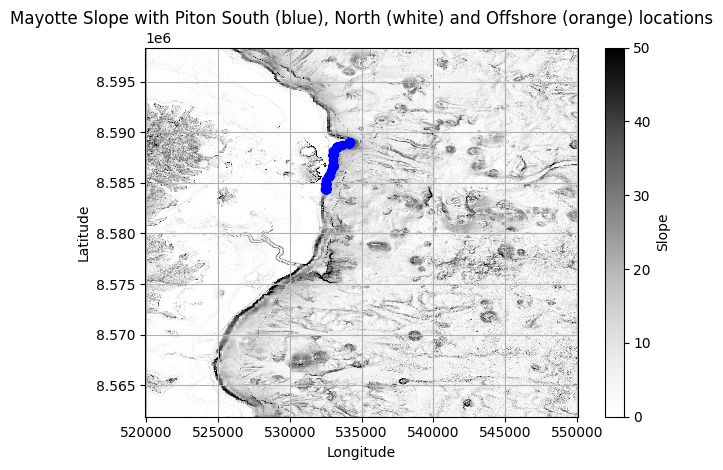

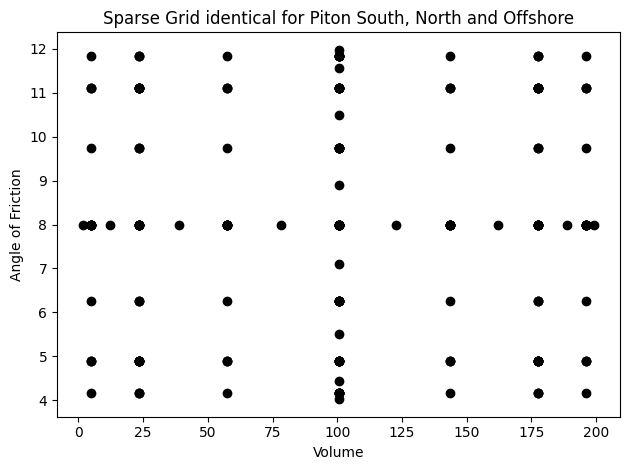

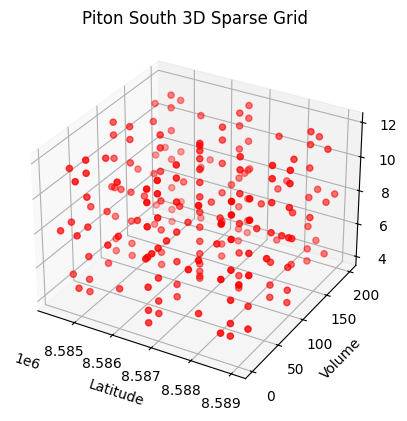

In [15]:
"""
Visualization of the results
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D

"""
Geographical locations of the deterministic simulations
"""

# Load slope data
slope_data = loadmat('data/Mayotte_slope.mat')
xx = slope_data['xx']
yy = slope_data['yy']
zz = slope_data['zz']
# Plot base pcolor map
plt.figure()
plt.pcolormesh(xx, yy, zz, shading='auto', cmap='Greys', vmin=0, vmax=50)
# Plot South points
PS_data = np.loadtxt('results/Piton_South.txt')
lonPS, latPS = PS_data[:, 0], PS_data[:, 1]
plt.plot(lonPS, latPS, 'bo')

#********************************************************
# Complete with Piton North (white) and Offshore (orange)
#********************************************************

# Show the plot
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Mayotte Slope with Piton South (blue), North (white) and Offshore (orange) locations")
plt.colorbar(label='Slope')
plt.grid(True)
plt.tight_layout()
plt.show()
#
"""
Sparse grid
"""

#----------------
# For Piton South
#----------------

# Plot 2D scatter of sparse grid
VolPS, FriPS = PS_data[:, 2], PS_data[:, 3]
plt.plot(VolPS, FriPS, 'ko')
plt.xlabel("Volume")
plt.ylabel("Angle of Friction")
plt.title("Sparse Grid identical for Piton South, North and Offshore")
plt.tight_layout()
plt.show()

# Plot 3D scatter of sparse grid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(latPS, VolPS, FriPS, c='r', marker='o')
ax.set_xlabel('Latitude')
ax.set_ylabel('Volume')
ax.set_zlabel('Angle')
ax.set_title('Piton South 3D Sparse Grid')
plt.show()

#*************************************************************
# any other combination of the sparse grids can now be plotted
#*************************************************************


--------------------------------------------------
## STEP 3: RUNNING THE DETERMINISTIC SIMULATIONS
--------------------------------------------------

This step **cannot be completed** through the **Jupyter Notebook** in this **User Manual**, as it requires significant numerical resources. However, the **Landslide-HySEA model** (REFERENCES) and its **setup** for running the deterministic simulations of Piton South, North and Offshore are presented below to facilitate the **reproducibility of the results**.

### 1) LANDSLIDE-HYSEA MODEL SETUP
### 2) GENERATION OF THE LANDSLIDE VOLUMES

------------------------------------------------------
## STEP 4: FORMATING THE DETERMINISTIC SIMULATION OUTPUTS
------------------------------------------------------

In this step, it is assumed that:

- the **outputs of the deterministic simulations** have already been stored in files (e.g., Piton_South_DGP_dim_3_order_6_simus.mat, Piton_North_DGP_dim_3_order_6_simus.mat, Piton_Offshore_DGP_dim_3_order_6_simus.mat, for the Mayotte test case), which contain **3 different variables**: the time of arrival **time_max_surf[ns,nx,ny]**, the maximum elevation **zeta_max_surf[ns,nx,ny]**, and the maximum speed **velo_max_surf[ns,nx,ny]** of the tsunami waves. Here, **ns** denotes the total **number of simulations** (e.g., 207 for the Mayotte test case) and **[nx,ny]** are the **horizontal dimensions** (longitude, latitude) of the domain used in the deterministic simulations.

- the locations where the surrogate models are to be built have already been defined in the file **surrogate_model_locations.mat**, which contains the grid indices where to extract the data from the domain **index_coast[nsm]** as well as the associated depths **h_coast[nsm]**, longitudes **lon_coast[nsm]** and latitudes **lat_coast[nsm]**. Here, **nsm** is the number of surrogate models to be constructed. The **locations** where the surrogate models are built for the **Mayotte test case**  are illustrated in **Figure 3**.

<center><img src="figures/JN_UM_figure_3.jpg"/></center>
<center><b>Figure 3.</b>Surrogate model locations (and number) along the Grande Terre and Petite Terre coastlines for the Mayotte test case.</center>

<br>

**Important Note**: The gPCE decomposition requires the **tsunami hazard quantities** to have **continuous distributions**—i.e., **NaN values are not allowed**. This implies that the selected **locations** must be sufficiently deep to remain submerged (**outside the inundation zone**), ensuring that the maximum elevation, maximum speed, and time of arrival are **defined for all deterministic simulations**.

***<font color='green'>@user Run the cell to download the deterministic simulation results</font>***


In [ ]:
import gdown
url = 'https://drive.google.com/file/d/1rJJVbnhyMVf0vNF78YxmfvilneP6KWmh/view?usp=sharing'
output = 'data/Piton_South_simus.mat'
gdown.download(url, output, quiet=False, fuzzy=True)

***<font color='green'>@user Complete the code for Piton North and Offshore, then Run the cell below to format the outputs of the deterministic simulations</font>***

In [18]:
"""
--------------------------
Landslide-Tsurrogate v1.0
--------------------------

Main program: Landslide_Tsurrogate_format_simulations
------------

This program allows the user to reformat the deterministic
simulations for creating the surrogate models

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
CAUTION: the program assumes that the indices have been created in Matlab 
         hence index_coast = index_coast -1 and the use of flatten(order='F')
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

"""

import numpy as np
import scipy.io

"""
Load general information
"""

data = scipy.io.loadmat('data/surrogate_model_locations.mat')
param_data = scipy.io.loadmat('results/Piton_South_param.mat')
param = np.squeeze(np.array(param_data['param']))
index_coast = data['index_coast'].flatten() - 1
nsim=len(param[maxdeg]['index'][0][0].flatten())

"""
Piton South
"""

print("----------------------------------------------------------------")
print(" Formatting the deterministic simulation outputs for Piton South")
print("----------------------------------------------------------------")

# Load data from .mat files
simus_data = scipy.io.loadmat('data/Piton_South_simus.mat')
zeta_max_surf = simus_data['zeta_max_surf']
velo_max_surf = simus_data['velo_max_surf']
time_max_surf = simus_data['time_max_surf']
# Initialize the model list
model = []
# Loop through each simulation and extract data
for i in range(nsim):
    model_i = {}
    model_i['Zeta_Z'] = zeta_max_surf[i, :, :].flatten(order='F')[index_coast]
    model_i['Velo_Z'] = velo_max_surf[i, :, :].flatten(order='F')[index_coast]
    # The HySEA model put -1 for the time of arrival when the tsunami waves are too small
    # However, as mentionned before, the surrogate models can only be built with continous data (no NaN allowed)
    # Replace -1 values in the time_max_surf array with 1800 
    time_data = time_max_surf[i, :, :].flatten(order='F')
    time_data[time_data == -1] = 1800
    model_i['Time_Zeta_Z'] = time_data[index_coast]    
    # Append model_i to model
    model.append(model_i)
# Save the model to a .mat file
scipy.io.savemat('results/Piton_South_model.mat', {'model': model})

print("-------------------------------------------------------------------------------")
print("The results have been saved in: results/Piton_South_model.mat")
print("-------------------------------------------------------------------------------")

#***********************************************
# complete the code for Piton North and Offshore
#***********************************************


----------------------------------------------------------------
 Formatting the deterministic simulation outputs for Piton South
----------------------------------------------------------------
-------------------------------------------------------------------------------
The results have been saved in: results/Piton_South_model.mat
-------------------------------------------------------------------------------


The **fourth step** of generating surrogate models based on gPCE is now **completed**.

***<font color='green'>@user Have a look at the new files in the results folder</font>***

------------------------------------------------------
## STEP 5: CREATING THE SURROGATE MODELS
------------------------------------------------------
### 1) QUADRATURE FUNCTIONS 

The **two functions** below are used to calculate the **deterministic coefficients** of the gPCE—which represent the projection of tsunami maximum elevation, maximum speed, and time of arrival onto each polynomial basis. They use a **quadrature-based PSA** derived from the **formatted deterministic numerical outputs**. The functions **assume** that all the stochastic variables follow **uniform distributions** and employ the **Legendre polynomials**. 

The **first function** provides the **squared L2 norm** of a specified **Legendre polynomial** over a given interval [a,b].

***<font color='green'>@user Check the function below and run the cell to upload it in the notebook</font>***

In [19]:
def norm2_legendre_polynomials(degree, a, b):
    """
    Parameters:
    - degree: int, the degree of the Legendre polynomial.
    - a: float, lower bound of the interval.
    - b: float, upper bound of the interval.
    Returns:
    - PsiN2: float, the squared L2 norm of the Legendre polynomial over [a, b].
    """

    # Initialize list to store polynomial coefficients
    Le = [None] * (degree + 1)
    Le[0] = np.array([1.0])       # L_0(x) = 1
    if degree >= 1:
        Le[1] = np.array([1.0, 0.0])   # L_1(x) = x
    # Generate Legendre polynomials using recurrence relation
    for n in range(2, degree + 1):
        coeff1 = ((2 * n - 1) / n) * np.concatenate((Le[n - 1], [0]))
        coeff2 = ((n - 1) / n) * np.concatenate(([0, 0], Le[n - 2]))
        Le[n] = coeff1 - coeff2
    # Define the function to integrate
    def integrand(x):
        # Map x from [a, b] to [-1, 1]
        x_mapped = (2 * x - a - b) / (b - a)
        # Evaluate the polynomial at x_mapped
        poly_val = np.polyval(Le[degree], x_mapped)
        return poly_val ** 2
    # Perform numerical integration over [a, b]
    PsiN2, _ = quad(integrand, a, b)
    return PsiN2

The INPUT parameters of the function are:

- integer **degree** Legendre polynomial **degree**
- real **a,b** interval of definition [a,b] with b > a
        
The OUTPUT result of the function is:

- real **PsiN2** **squared L2 norm** of the Legendre polynomial at the defined degree over the [a,b] interval of definition
    
***<font color='green'>@user Test the norm2_legendre_polynomials function to understand how it works</font>***

In [ ]:
"""
Test the norm2_legendre_polynomials function
"""
import numpy as np
from scipy.integrate import quad
degree =
a =
b =
norm_squared = norm2_legendre_polynomials(degree, a, b)
print(f"Squared L2 norm: {norm_squared}")

The **second function** calculates the **deterministic coefficients of the gPCE** using the **PSA** with the **Gauss-Patterson** sparse grids and is based on the following litterature:

- Florian Heiss, Viktor Winschel (2008): "Likelihood approximation by numerical integration on sparse grids", Journal of Econometrics, Vol. 144, pp. 62-80.

**Important Note**: Since **all the quantities** considered (maximum elevation, maximum speed and time of arrival) are **strictly positive**, the **gPCE** are contructured for the **logarithm of these quantities**. This ensures that the **final results**—obtained by exponentiating the outputs—remain **positive**. This approach allows for a **better representation** of the **lower-end values** but may introduce some **distortion** in the **higer-end values**. 

***<font color='green'>@user Check the function below and run the cell to upload it in the notebook</font>***

In [20]:
def surrogate_model_gauss_patterson_psa_coeff(param, model, a, b, maxdeg, option):
    
    """
    Parameters:
    - param: list of dictionaries containing 'Z' and 'index' keys.
    - model: list of dictionaries containing 'Zeta_Z', 'Velo_Z', and 'Time_Zeta_Z'.
    - a, b: arrays defining the limits of the uniform distribution.
    - maxdeg: maximum to tal order for the polynomial chaos expansion.
    - option: 0 for normal or 1 for delayed Gauss-Patterson sequences.
    Returns:
    - coeff: list of dictionaries containing 'alpha', 'zeta', 'velo', and 'time'.
    """
    # Initialization of the matrices
    nmodes = len(a)
    nx = len(model[0][0]['Zeta_Z'][0][0].flatten())
    # Generate Legendre Polynomials up to maxdeg
    Le = [None] * (maxdeg + 1)
    Le[0] = np.array([1.0])  # L_0 = 1
    Le[1] = np.array([1.0, 0.0])  # L_1 = x
    for n in range(2, maxdeg + 1):
        Le[n] = ((2 * n - 1) / n) * np.concatenate((Le[n - 1], [0])) - ((n - 1) / n) * np.concatenate(([0, 0], Le[n - 2]))
    # gPCE computation
    coeff = []
    Z = np.array(param[0][maxdeg]['Z'][0][0])
    index = param[0][maxdeg]['index'][0][0].flatten()
    for alpha_norm1 in range(maxdeg+1):        
        print('-------------------------------')
        print(f'||alpha||_1 = {alpha_norm1}')
        print('-------------------------------')
        # reset index to zero
        start = 0
        # multi-indexes alphal with sum equal to alpha_norm1
        alpha = get_seq(nmodes, nmodes + alpha_norm1)
        alpha_final = []
        zeta_final = []
        velo_final = []
        time_final = []
        for l in range(alpha.shape[0]):
            print(f'Completion: {100 * (l + 1) / alpha.shape[0]:.2f}%')            
            Znew, Wnew = gauss_patterson_nested_rule_nd(alpha[l, :], a, b, option)
            Znew = Znew.astype(np.float32)
            # find the corresponding simulations
            Zeta_Z = np.full((nx, len(Wnew)), np.nan)
            Velo_Z = np.full((nx, len(Wnew)), np.nan)
            Time_Z = np.full((nx, len(Wnew)), np.nan)
            for ss in range(len(Wnew)):
                matches = np.all(Z == Znew[ss, :], axis=1)
                if np.any(matches):
                    ind_new = np.where(matches)[0][0]
                    # Log of the quantities to make sure to obtain positive results 
                    Zeta_Z[:, ss] = np.log(model[0][index[ind_new]]['Zeta_Z'][0][0].flatten())
                    Velo_Z[:, ss] = np.log(model[0][index[ind_new]]['Velo_Z'][0][0].flatten())
                    Time_Z[:, ss] = np.log(model[0][index[ind_new]]['Time_Zeta_Z'][0][0].flatten())
            # multi-indexes alpha_sum varying between [0 0 ... 0] and alphal
            max_alpha = np.max(alpha[l, :])
            alpha_sum = np.array(np.meshgrid(*[np.arange(max_alpha + 1) for _ in range(nmodes)])).T.reshape(-1, nmodes)
            mask = np.all(alpha_sum <= alpha[l, :], axis=1)
            alpha_sum = alpha_sum[mask]
            zeta_temp = np.zeros((nx, alpha_sum.shape[0]))
            velo_temp = np.zeros((nx, alpha_sum.shape[0]))
            time_temp = np.zeros((nx, alpha_sum.shape[0]))
            for s in range(alpha_sum.shape[0]):
                # calculate the quadrature coefficients
                qrule_coeff = Wnew.copy()
                for n in range(nmodes):
                    x_scaled = (2 * Znew[:, n] - a[n] - b[n]) / (b[n] - a[n])
                    poly_val = np.polyval(Le[alpha_sum[s, n]], x_scaled)
                    norm = norm2_legendre_polynomials(alpha_sum[s, n], a[n], b[n])                    
                    qrule_coeff *= poly_val / norm
                # Quadrature rule - Coefficients of the gPCE
                zeta_temp[:, s] = Zeta_Z @ qrule_coeff
                velo_temp[:, s] = Velo_Z @ qrule_coeff
                time_temp[:, s] = Time_Z @ qrule_coeff
            # Store results for this degree
            alpha_final.append(alpha_sum)
            zeta_final.append(zeta_temp)
            velo_final.append(velo_temp)
            time_final.append(time_temp)
        # Store final results 
        coeff.append({
            'alpha': np.vstack(alpha_final),
            'zeta': np.hstack(zeta_final),
            'velo': np.hstack(velo_final),
            'time': np.hstack(time_final)
        })

    return coeff

The INPUT parameters of the function are:

- structure **param[maxdeg+1]** containing the paramters: Z[nmodes,nwj] the chosen samples of the stochastic variables and index[nwj] the index corresponding to the unique deterministic simulation 
- structure **model[nwj]** containing the formated deterministic outputs: **Zeta_Z[nx]**  the maximum elevation, **Velo_Z[nx]** the maximum speed and **Time_Z[nx]** the time of arrival of the tsunami waves at the **locations [nx]** where the surrogate models need to be built
- integer **maxdeg** maximum **total order** of the Legendre polynomials
- real **a[nmodes],b[nmodes]** interval of definition [a,b] with b > a
- integer **option** **0 = normal or 1 = delayed** Gauss-Patterson sequencies 
        
The OUTPUT result of the function is:
- structure **coeff[maxdeg+1]** containing the **multi-index alpha[nl,nmodes]** of **dimension [nl]** and the **coefficients of the gPCE zeta[nx,nl], velo[nx,nl] and time[nx,nl]** for respectively the maximum elevation, the maximum speed and the time of arrival at the **locations [nx]** where the surrogate models are built.

### 2) GENERATION OF THE gPCE COEFFICIENTS

***<font color='green'>@user Complete the code for Piton North and Offshore, then Run the cell below to create the gPCE coefficients</font>***

In [23]:
"""
--------------------------
Landslide-Tsurrogate v1.0
--------------------------

Main program: Landslide_Tsurrogate_psa_coefficients
------------

This program generates the deterministic coefficients of the gPCE based
on the PSA.

"""

import scipy.io
import numpy as np
from scipy.integrate import quad

print("-----------")
print("Piton South")
print("-----------")

a_south = np.array([as_y, as_v, as_f])
b_south = np.array([bs_y, bs_v, bs_f])
param = scipy.io.loadmat('results/Piton_South_param.mat')['param']
model = scipy.io.loadmat('results/Piton_South_model.mat')['model']
coeff = surrogate_model_gauss_patterson_psa_coeff(param,model,a_south,b_south,maxdeg,1)
scipy.io.savemat('results/Piton_South_coeff.mat',{'coeff': coeff})

print("-------------------------------------------------------------------------------")
print("The results have been saved in: results/Piton_South_coeff.mat")
print("-------------------------------------------------------------------------------")

#***********************************************
# complete the code for Piton North and Offshore
#***********************************************


-----------
Piton South
-----------
-------------------------------
||alpha||_1 = 0
-------------------------------
Completion: 100.00%
-------------------------------
||alpha||_1 = 1
-------------------------------
Completion: 33.33%
Completion: 66.67%
Completion: 100.00%
-------------------------------
||alpha||_1 = 2
-------------------------------
Completion: 16.67%
Completion: 33.33%
Completion: 50.00%
Completion: 66.67%
Completion: 83.33%
Completion: 100.00%
-------------------------------
||alpha||_1 = 3
-------------------------------
Completion: 10.00%
Completion: 20.00%
Completion: 30.00%
Completion: 40.00%
Completion: 50.00%
Completion: 60.00%
Completion: 70.00%
Completion: 80.00%
Completion: 90.00%
Completion: 100.00%
-------------------------------
||alpha||_1 = 4
-------------------------------
Completion: 6.67%
Completion: 13.33%
Completion: 20.00%
Completion: 26.67%
Completion: 33.33%
Completion: 40.00%
Completion: 46.67%
Completion: 53.33%
Completion: 60.00%
Completion

The **fifth step** of generating surrogate models based on gPCE decomposition is now **completed**.

***<font color='green'>@user Have a look at the new files in the results folder</font>***

### 3) USING THE SURROGATE MODELs FOR PTHA

The **main function** is the emulator that calculates the **surrogate model results** using the **PSA** with the **Gauss-Patterson** sparse grids.

**Important Note**: **Exponentials** are applied to obtained the **final results** as the surrogate models were built for the logarithm of all the quantities. 

***<font color='green'>@user Check the function below and run the cell to upload it in the notebook</font>***

In [26]:
def surrogate_model_gauss_patterson_psa_PTHA(maxdeg, a, b, coeff, nw, ar, br):
        
    nmodes = len(ar)
    nx = len(coeff[0][0]['zeta'][0][0].flatten())
    
    # Build Legendre polynomials up to maxdeg (Le[0] = constant 1, Le[1] = x, etc.)
    Le = [None] * (maxdeg + 1)
    Le[0] = np.array([1.0])  # L_0 = 1
    Le[1] = np.array([1.0, 0.0])  # L_1 = x
    for n in range(2, maxdeg + 1):
        Le[n] = ((2 * n - 1) / n) * np.concatenate((Le[n - 1], [0])) - ((n - 1) / n) * np.concatenate(([0, 0], Le[n - 2]))
        
    # generate random input  
    np.random.seed(0)
    seed_01 = np.random.rand(nmodes, nw)    
    # rescaling to fit the appropriate intervals
    Zw = np.tile(ar, (nw,1)).T + np.tile((br - ar), (nw,1)).T * seed_01
               
    # Preallocate true-model matrices
    zeta_temp = np.zeros((nx, nw))
    velo_temp = np.zeros((nx, nw))
    time_temp = np.zeros((nx, nw))
    PTHA=[]
    
    for alpha_norm1 in range(max(0, maxdeg - nmodes + 1), maxdeg + 1):
        # Smolyak coefficient
        C_alpha = ((-1)**(maxdeg - alpha_norm1) * comb(nmodes - 1, maxdeg - alpha_norm1))            
        # Retrieve multi-indices and PCE coefficients for this alpha_norm1
        this = coeff[0][alpha_norm1]
        alpha    = np.array(this['alpha'][0][0]) 
        zeta_hat = np.array(this['zeta'][0][0])   
        velo_hat = np.array(this['velo'][0][0])
        time_hat = np.array(this['time'][0][0])
        nww = alpha.shape[0]            
        # For each multi-index row
        for l in range(nww):
            multH = np.ones(nw)
            for n in range(nmodes):
                x_scaled = (2 * Zw[n, :] - a[n] - b[n]) / (b[n] - a[n])
                multH *= np.polyval(Le[alpha[l,n]], x_scaled)
            for i in range(nx):
                zeta_temp[i, :] += C_alpha * zeta_hat[i, l] * multH
                velo_temp[i, :] += C_alpha * velo_hat[i, l] * multH
                time_temp[i, :] += C_alpha * time_hat[i, l] * multH
        # Exponentiate to undo the log transform and get the real values of the original quantities
        PTHA.append({
            'zeta': np.exp(zeta_temp),
            'velo': np.exp(velo_temp),
            'time': np.exp(time_temp)
        })
    
    return PTHA

The INPUT parameters of the function are:

- integer **maxdeg** maximum **total order** of the Legendre polynomials
- real **a[nmodes],b[nmodes]** interval of definition [a,b] with b > a
- structure **coeff[maxdeg+1]** containing the **multi-index alpha[nl,nmodes]** of **dimension [nl]** and the **coefficients of the gPCE zeta[nx,nl], velo[nx,nl] and time[nx,nl]** for respectively the maximum elevation, the maximum speed and the time of arrival at the **locations [nx]** where the surrogate models are built
- integer **nw** **number of random samples** for generating the PTHA
- real **ar[nmodes],br[nmodes]** interval of definition [ar,br] with br > ar defined by the user to obtain specific results 
  
The OUTPUT result of the function is:
- structure **PTHA** containing **results of the surrogate models zeta[nx,nw], velo[nx,nw] and time[nx,nw]** for respectively the maximum elevation, the maximum speed and the time of arrival at the **locations [nx]** where the surrogate models are built and for the **[nw] random samples**
  
***<font color='green'>@user Complete the code for Piton North and Offshore, then Run the cell below to test the surrogate model generation and plot the results</font>***

In [27]:
"""
--------------------------
Landslide-Tsurrogate v1.0
--------------------------

Main program: Landslide_Tsurrogate_surrogate_models
------------

This program create the surrogate model results for
user-specific inputs.

"""

import scipy.io
import numpy as np
from math import comb, exp

#---------------------------------------------------
# Test for Piton South
#---------------------------------------------------

# --- User Defined Paramters ---

# chosen locations in latitude y such as 8584345.32 < y < 8589024.15
a0_y = 8589000.0
b0_y = 8589024.0
# chosen volume y such as 1.0 < v < 200.0
a0_v = 100.0
b0_v = 150.0
# chosen angle of friction f such as 4.0 < f < 12.0
a0_f = 4.0
b0_f = 12.0
# chosen total order maxdeg0 such as 1 < maxdeg0 < 6
maxdeg0 = 5
# chosen number of samples for the PTHA
nw0 = 20000

print("-----------")
print("Piton South")
print("-----------")

# User Inputs
a0 = np.array([a0_y, a0_v, a0_f])
b0 = np.array([b0_y, b0_v, b0_f])
# Interval of definition of the stochastic variables
a_south = np.array([as_y, as_v, as_f])
b_south = np.array([bs_y, bs_v, bs_f])

# Generate the PTHA
coeff = scipy.io.loadmat('results/Piton_South_coeff.mat')['coeff']
PTHA = surrogate_model_gauss_patterson_psa_PTHA(maxdeg0, a_south, b_south, coeff, nw0, a0, b0)
scipy.io.savemat('results/Piton_South_PTHA.mat',{'PTHA': PTHA})

print("-------------------------------------------------------------------------------")
print("The results have been saved in: results/Piton_South_PTHA.mat")
print("-------------------------------------------------------------------------------")

#***********************************************
# complete the code for Piton North and Offshore
#***********************************************


-----------
Piton South
-----------
-------------------------------------------------------------------------------
The results have been saved in: results/Piton_South_PTHA.mat
-------------------------------------------------------------------------------


------------------------------------------------------
## STEP 6: EVALUATING THE SURROGATE MODEL CONVERGENCE, PERFORMANCE AND SENSITIVITY
------------------------------------------------------
### 1) EVALUATION FUNCTIONS

This function **prepares** all the **data** needed for the evaluation of the surrogate models.

***<font color='green'>@user Check the function below and run the cell to upload it in the notebook</font>***

In [28]:
def surrogate_model_gauss_patterson_psa_evals(param, model, coeff, a, b, maxdeg):
    """
    Evaluation of Pseudo Spectral Approximation with Gauss-Patterson Sparse grids.
    """
    
    nmodes = len(a)
    nx = len(model[0][0]['Zeta_Z'][0][0].flatten())
    
    # Build Legendre polynomials up to maxdeg (Le[0] = constant 1, Le[1] = x, etc.)
    Le = [None] * (maxdeg + 1)
    Le[0] = np.array([1.0])  # L_0 = 1
    Le[1] = np.array([1.0, 0.0])  # L_1 = x
    for n in range(2, maxdeg + 1):
        Le[n] = ((2 * n - 1) / n) * np.concatenate((Le[n - 1], [0])) - ((n - 1) / n) * np.concatenate(([0, 0], Le[n - 2]))
    # Prepare error structure as a list of dicts
    evals = []
    # Retrieve all simulations  
    Z = np.array(param[0][maxdeg]['Z'][0][0])
    index = param[0][maxdeg]['index'][0][0].flatten()
    ns = Z.shape[0]
    Z = Z.T
    # Preallocate true-model matrices
    Zeta_Z = np.empty((nx, ns))
    Velo_Z = np.empty((nx, ns))
    Time_Z = np.empty((nx, ns))
    for i in range(ns):
        entry = model[0][index[i]]
        Zeta_Z[:, i] = np.array(entry['Zeta_Z'][0][0])
        Velo_Z[:, i] = np.array(entry['Velo_Z'][0][0])
        Time_Z[:, i] = np.array(entry['Time_Zeta_Z'][0][0])
    # Store the true values as error[0]
    evals.append({
        'Zeta_Z': Zeta_Z.copy(),
        'Velo_Z': Velo_Z.copy(),
        'Time_Z': Time_Z.copy()
    })
    # Loop over increasing maximal gPCE degree
    for nmaxdeg in range(0, maxdeg+1):
        print('*******************************')
        print(f'Calculate PCE for maxdeg = {nmaxdeg}')
        print('*******************************')        
        # initialize PCE approximations
        zeta_PCE = np.zeros((nx, ns))
        velo_PCE = np.zeros((nx, ns))
        time_PCE = np.zeros((nx, ns))        
        # Smolyak summation over alpha norms
        for alpha_norm1 in range(max(0, nmaxdeg - nmodes + 1), nmaxdeg + 1):
            # Smolyak coefficient
            C_alpha = ((-1)**(nmaxdeg - alpha_norm1) 
                       * comb(nmodes-1, nmaxdeg - alpha_norm1))            
            # Retrieve multi-indices and PCE coefficients for this alpha_norm1
            this = coeff[0][alpha_norm1]
            alpha_mat = np.array(this['alpha'][0][0]) 
            zeta_hat = np.array(this['zeta'][0][0])   
            velo_hat = np.array(this['velo'][0][0])
            time_hat = np.array(this['time'][0][0])
            nw = alpha_mat.shape[0]            
            # For each multi-index row
            for l in range(nw):
                alpha_row = alpha_mat[l]                
                # Build the product of univariate polynomials
                # multH: shape (ns,)
                multH = np.ones(ns)
                for m in range(nmodes):
                    x_scaled = (2 * Z[m, :] - a[m] - b[m]) / (b[m] - a[m])
                    P = np.polyval(Le[alpha_row[m]], x_scaled)
                    multH *= P                
                # Accumulate PCE contributions
                # Note: zeta_hat[:, l] is shape (nx,), so we outer with multH
                zeta_PCE += C_alpha * np.outer(zeta_hat[:, l], multH)
                velo_PCE += C_alpha * np.outer(velo_hat[:, l], multH)
                time_PCE += C_alpha * np.outer(time_hat[:, l], multH)        
        # Exponentiate to undo the log transform and get the real values of the original quantities
        evals.append({
            'Zeta_PCE': np.exp(zeta_PCE),
            'Velo_PCE': np.exp(velo_PCE),
            'Time_PCE': np.exp(time_PCE)
        })
    
    return evals

The INPUT parameters of the function are:

- structure **param[maxdeg+1]** containing the paramters: **Z[nmodes,nwj]** the chosen samples of the stochastic variables and **index[nwj]** the index corresponding to the unique deterministic simulations 
- structure **model[nwj]** containing the formated deterministic outputs: **Zeta_Z[nx]**  the maximum elevation, **Velo_Z[nx]** the maximum speed and **Time_Z[nx]** the time of arrival of the tsunami waves at the locations where the surrogate models need to be built
- structure **coeff[maxdeg+1]** containing the **multi-index alpha[nl,nmodes]** of **dimension [nl]** and the **coefficients of the gPCE zeta[nx,nl], velo[nx,nl] and time[nx,nl]** for respectively the maximum elevation, the maximum speed and the time of arrival at the **locations [nx]** where the surrogate models are built
- real **a[nmodes],b[nmodes]** interval of definition [a,b] with b > a
- integer **maxdeg** maximum **total order** of the Legendre polynomials

The OUTPUT result of the function is:
- structure **evals[maxdeg+2]** containing (1) **evals[0].Zeta_Z[nwj,nx], evals[0].Velo_Z[nwj,nx] and evals[0].Time_Z[nwj,nx]** the results of the deterministic simulations & (2) **avals[1:maxdeg+1].Zeta_PCE[nwj,nx], evals[1:maxdeg+1].Velo_PCE[nwj,nx], evals[1:maxdeg+1].Time_PCE[nwj,nx]** for the number of **deterministic simulations [nwj]** for which, and, at the **locations [nx]** where, the surrogate models are built

The function is used in the **main program** below which prepares all the **data** for the **comparison** between the **deterministic simulation** outputs and the **surrogate model** results. 

***<font color='green'>@user Complete the code for Piton North and Offshore, then Run the cell below to create the data required to evaluate the surrogate model convergence and performance</font>***

In [29]:
"""
--------------------------
Landslide-Tsurrogate v1.0
--------------------------

Main program: Landslide_Tsurrogate_evaluations
------------

This program is used to create the input for the evaluation of
the surrogate models.

"""

import scipy.io
import numpy as np
from math import comb, exp

print("-----------")
print("Piton South")
print("-----------")

a_south = np.array([as_y, as_v, as_f])
b_south = np.array([bs_y, bs_v, bs_f])
param = scipy.io.loadmat('results/Piton_South_param.mat')['param']
model = scipy.io.loadmat('results/Piton_South_model.mat')['model']
coeff = scipy.io.loadmat('results/Piton_South_coeff.mat')['coeff']
evals = surrogate_model_gauss_patterson_psa_evals(param,model,coeff,a_south,b_south,maxdeg)
scipy.io.savemat('results/Piton_South_evals.mat',{'evals': evals})

print("-------------------------------------------------------------------------------")
print("The results have been saved in: results/Piton_South_evals.mat")
print("-------------------------------------------------------------------------------")

#***********************************************
# complete the code for Piton North and Offshore
#***********************************************


-----------
Piton South
-----------
*******************************
Calculate PCE for maxdeg = 0
*******************************
*******************************
Calculate PCE for maxdeg = 1
*******************************
*******************************
Calculate PCE for maxdeg = 2
*******************************
*******************************
Calculate PCE for maxdeg = 3
*******************************
*******************************
Calculate PCE for maxdeg = 4
*******************************
*******************************
Calculate PCE for maxdeg = 5
*******************************
*******************************
Calculate PCE for maxdeg = 6
*******************************
-------------------------------------------------------------------------------
The results have been saved in: results/Piton_South_evals.mat
-------------------------------------------------------------------------------


### 2) SENSITIVITY FUNCTIONS

**Variance-based sensitivity analysis** (often referred to as the **Sobol method or Sobol indices**, after Ilya M. Sobol) is a form of global sensitivity analysis. This **function** computes the **total Sobol’ sensitivities (ST)** for the maximum elevation, the maximum speed, and the time of arrival based on the **gPCE deterministic coefficients**.

***<font color='green'>@user Check the function below and run the cell to upload it in the notebook</font>***

In [32]:
def surrogate_model_gauss_patterson_psa_sensi(coeff, maxdeg):
    
    # Dimensions
    alpha0 = np.array(coeff[0][0]['alpha'][0][0])
    nx = np.array(coeff[0][0]['zeta'][0][0]).shape[0]
    nmodes = alpha0.shape[1]
    # Preallocate total sensitivity arrays
    sensi = []
    ST_Zeta = np.full((nx, nmodes), np.nan)
    ST_Velo = np.full((nx, nmodes), np.nan)
    ST_Time = np.full((nx, nmodes), np.nan)        
    # Gather all alpha and weighted coefficients
    alpha_list = []
    coeff_zeta = []
    coeff_velo = []
    coeff_time = []
    for alpha_norm1 in range(max(0, maxdeg - nmodes + 1), maxdeg + 1):
        # Smolyak coefficient
        C_alpha = ((-1) ** (maxdeg - alpha_norm1)
                   * comb(nmodes - 1, maxdeg - alpha_norm1))        
        entry = coeff[0][alpha_norm1]
        alpha_list.append(entry['alpha'][0][0])         
        coeff_zeta.append(C_alpha * entry['zeta'][0][0])
        coeff_velo.append(C_alpha * entry['velo'][0][0])
        coeff_time.append(C_alpha * entry['time'][0][0])
    # Concatenate along the coefficient index dimension
    alpha = np.vstack(alpha_list) 
    coeff_zeta = np.hstack(coeff_zeta)
    coeff_velo = np.hstack(coeff_velo)
    coeff_time = np.hstack(coeff_time)
    # Remove purely constant terms (all zeros in alpha row)
    non_constant = ~(np.sum(alpha == 0, axis=1) == nmodes)
    alpha_nc = alpha[non_constant, :]
    zeta_nc = coeff_zeta[:, non_constant]
    velo_nc = coeff_velo[:, non_constant]
    time_nc = coeff_time[:, non_constant]
    # Total variances
    D_zeta = np.sum(zeta_nc ** 2, axis=1)
    D_velo = np.sum(velo_nc ** 2, axis=1)
    D_time = np.sum(time_nc ** 2, axis=1)
    # Compute total Sobol’ indices
    for i in range(nmodes):
        # indices of terms where alpha_nc[:, i] > 0
        indT = np.where(alpha_nc[:, i] > 0)[0]
        ST_Zeta[:, i] = np.sum(zeta_nc[:, indT] ** 2, axis=1) / D_zeta
        ST_Velo[:, i] = np.sum(velo_nc[:, indT] ** 2, axis=1) / D_velo
        ST_Time[:, i] = np.sum(time_nc[:, indT] ** 2, axis=1) / D_time
    # Store final results
    sensi.append({'ST_Zeta': ST_Zeta.copy(),
                        'ST_Velo': ST_Velo.copy(),
                        'ST_Time': ST_Time.copy()
                       })

    return sensi

The INPUT parameters of the function are:

- structure **coeff[maxdeg+1]** containing the **multi-index alpha[nl,nmodes]** of **dimension [nl]** and the **coefficients of the gPCE zeta[nx,nl], velo[nx,nl] and time[nx,nl]** for respectively the maximum elevation, the maximum speed and the time of arrival at the **locations [nx]** where the surrogate models are built
- integer **maxdeg** maximum **total order** of the Legendre polynomials

The OUTPUT result of the function is:
- structure **sensi** containing **ST_zeta[nx,nmodes], ST_velo[nx,nmodes] and ST_time[nx,nmodes]** **total sensitivities** for the maximum elevation, the maximum speed and the time of arrival of the tsunami waves for the number of **stochastic variables [nmodes]** chosen to built the surrogate models

The function is used in the **main program** below which calculate all **sensitivities** for the **order 5** of the **gPCE** as it is the order that will used to construct the **surrogate models**. 

***<font color='green'>@user Complete the code for Piton North and Offshore, then Run the cell below to calculate the sensitivities</font>***

In [34]:
"""
--------------------------
Landslide-Tsurrogate v1.0
--------------------------

Main program: Landslide_Tsurrogate_sensitivities
------------

This program calculate the total sensitivities of 
surrogate models to the stochastic variables with
an ANOVA method based on the Sobol' indices.

"""

import numpy as np
import scipy.io
from math import comb

print("-----------")
print("Piton South")
print("-----------")

coeff = scipy.io.loadmat('results/Piton_South_coeff.mat')['coeff']
sensi = surrogate_model_gauss_patterson_psa_sensi(coeff,5)
scipy.io.savemat('results/Piton_South_sensi.mat',{'sensi': sensi})

print("-------------------------------------------------------------------------------")
print("The results have been saved in: results/Piton_South_sensi.mat")
print("-------------------------------------------------------------------------------")

#***********************************************
# complete the code for Piton North and Offshore
#***********************************************


-----------
Piton South
-----------
-------------------------------------------------------------------------------
The results have been saved in: results/Piton_South_sensi.mat
-------------------------------------------------------------------------------


The **sixth step** of generating surrogate models based on gPCE is now **completed**.

***<font color='green'>@user Have a look at the new files in the results folder</font>***

### 3) VISUALIZATION

A basic **visualization** of the Piton South, North and Offshore **surrogate model convergence** can now be generated. The convergence is calculated for each surrogate model (i.e., at each chosen coastal location) based on the normalized squared errors.

The **surrogate model converges** when the **error decreases** with **increased gPCE orders** and tends to **zero** for the highest orders.

***<font color='green'>@user Complete the code for Piton North and Offshore, then Run the cell below to generate some plots</font>***

-------------------------------------------------------------------------------
-------------------------------------------------------------------------------


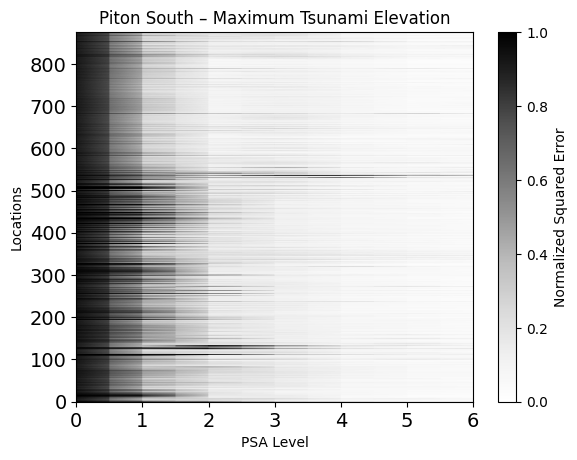

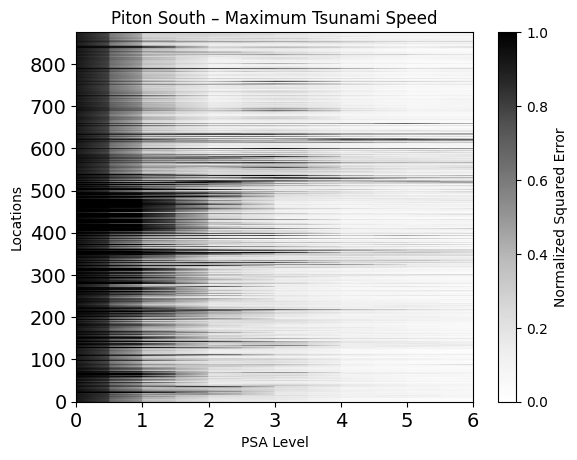

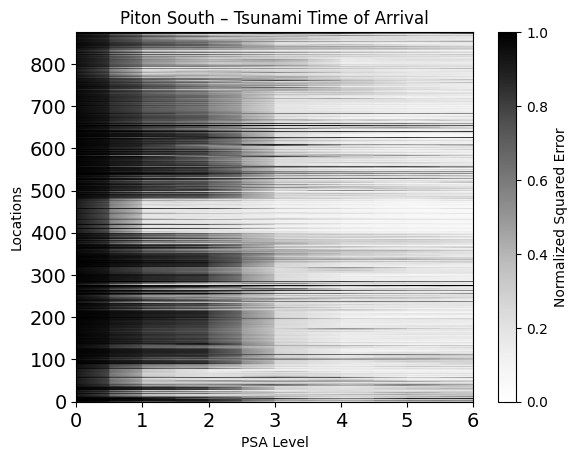

-------------------------------------------------------------------------------
-------------------------------------------------------------------------------


In [35]:
"""
Visualization of the convergence of the surrogate models
"""

import scipy.io
import numpy as np
import matplotlib.pyplot as plt

"""
Definition of the common plotting function
"""

def plot_error(matrix, title):
    plt.figure()
    plt.pcolormesh(matrix.T, shading='gouraud', cmap='Greys', vmin=0, vmax=1)
    plt.xlabel('PSA Level')
    plt.ylabel('Locations')
    plt.title(title)
    plt.colorbar(label='Normalized Squared Error')
    plt.gca().tick_params(labelsize=14)
    plt.gcf().set_facecolor('w')
    plt.show()

"""
Convergence of the surrogate models for Piton South 
"""

print("-------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------")

evals = scipy.io.loadmat('results/Piton_South_evals.mat')['evals']
nsim = np.array(evals[0][0]['Zeta_Z'][0][0]).shape[0]
norm_err_zeta = np.full((maxdeg+1, nsim), np.nan)
norm_err_velo = np.full((maxdeg+1, nsim), np.nan)
norm_err_time = np.full((maxdeg+1, nsim), np.nan)

den_zeta = np.sum((np.array(evals[0][0]['Zeta_Z'][0][0]) - np.array(evals[0][1]['Zeta_PCE'][0][0]))**2, axis=1)
den_velo = np.sum((np.array(evals[0][0]['Velo_Z'][0][0]) - np.array(evals[0][1]['Velo_PCE'][0][0]))**2, axis=1)
den_time = np.sum((np.array(evals[0][0]['Time_Z'][0][0]) - np.array(evals[0][1]['Time_PCE'][0][0]))**2, axis=1)
for d in range(1,maxdeg+2):
    num_zeta = np.sum((np.array(evals[0][0]['Zeta_Z'][0][0]) - np.array(evals[0][d]['Zeta_PCE'][0][0]))**2, axis=1)
    num_velo = np.sum((np.array(evals[0][0]['Velo_Z'][0][0]) - np.array(evals[0][d]['Velo_PCE'][0][0]))**2, axis=1)
    num_time = np.sum((np.array(evals[0][0]['Time_Z'][0][0]) - np.array(evals[0][d]['Time_PCE'][0][0]))**2, axis=1)
    norm_err_zeta[d-1, :] = num_zeta / den_zeta
    norm_err_velo[d-1, :] = num_velo / den_velo
    norm_err_time[d-1, :] = num_time / den_time
    
plot_error(norm_err_zeta, 'Piton South – Maximum Tsunami Elevation')
plot_error(norm_err_velo, 'Piton South – Maximum Tsunami Speed')
plot_error(norm_err_time, 'Piton South – Tsunami Time of Arrival')

print("-------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------")

#***********************************************
# complete the code for Piton North and Offshore
#***********************************************


From the **above results**, it is clear that most of the **surrogate models converge** and **minimize their error** at **order 5**—that is, **no significant change** in error is observed between **orders 5 and 6**. Consequently, all **surrogate models** can be **constructed using order 5**. The **additional deterministic simulations** performed to reach **order 6** are therefore independent and can be used to **evaluate the performance** of the surrogate models.

A basic **visualization** of the Piton South, North, and Offshore **surrogate model performance** can now be produced. Here, the performance is illustrated using scatter plots for all surrogate models simultaneously.

***<font color='green'>@user Complete the code for Piton North and Offshore, then Run the cell below to generate some plots</font>***

-------------------------------------------------------------------------------
-------------------------------------------------------------------------------


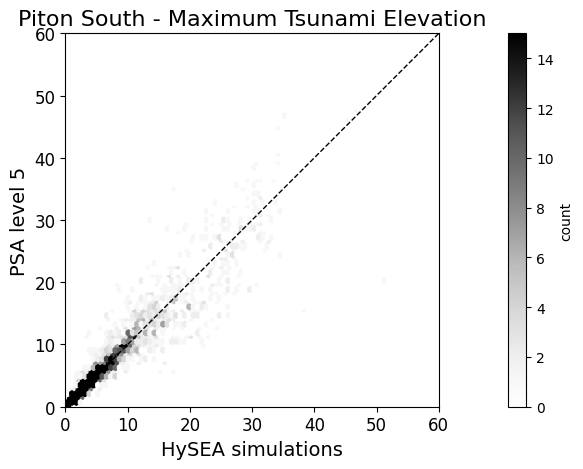

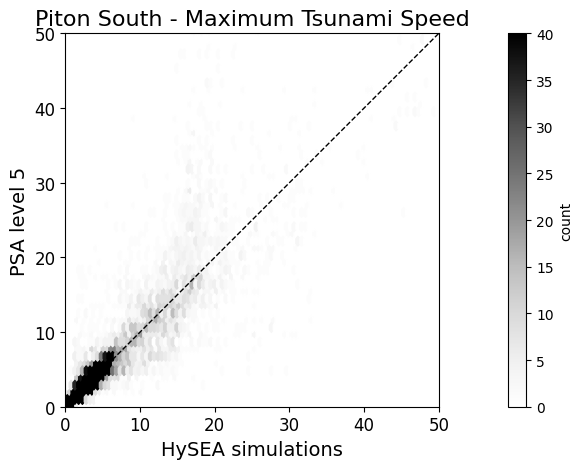

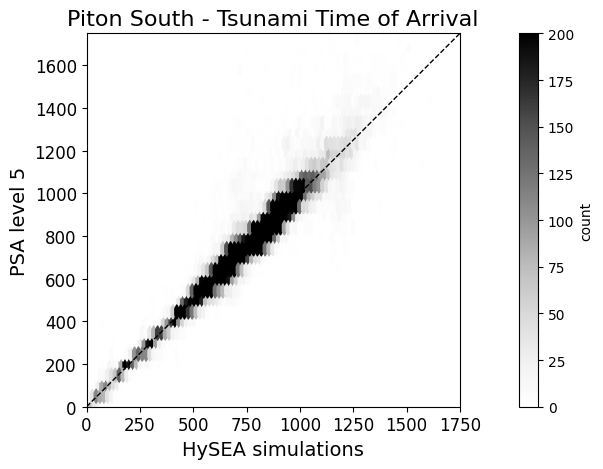

-------------------------------------------------------------------------------
-------------------------------------------------------------------------------


In [37]:
"""
Visualization of the performance of the surrogate models
"""

import numpy as np
import scipy.io
import matplotlib.pyplot as plt

"""
Definition of the common plotting function
"""

def plot_hex(simu, pce, lim, vmax, cmap='Greys', xlabel='', ylabel='', title=''):
    plt.figure()
    plt.plot([0, lim], [0, lim], 'k--', linewidth=1)
    hb = plt.hexbin(simu, pce, gridsize=100, xscale=[0, lim], yscale=[0, lim], cmap=cmap, vmin=0, vmax=vmax)
    plt.colorbar(hb, label='count')
    plt.axis('square')
    plt.xlim(0, lim)
    plt.ylim(0, lim)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16)
    plt.gca().tick_params(labelsize=12)
    plt.tight_layout()
    plt.show()

"""
Performance of the surrogate models for Piton South 
"""

print("-------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------")

param = scipy.io.loadmat('results/Piton_South_param.mat')['param']
evals = scipy.io.loadmat('results/Piton_South_evals.mat')['evals']
# Extract the two index arrays
index_5 = param[0][5]['index'][0][0].flatten()
index_6 = param[0][6]['index'][0][0].flatten()
# Find those in index_6 that are not in index_5
ind_independent = ~np.in1d(index_6, index_5)
Z_true  = np.array(evals[0][0]['Zeta_Z'][0][0])
Z_pce5  = np.array(evals[0][6]['Zeta_PCE'][0][0])
V_true  = np.array(evals[0][0]['Velo_Z'][0][0])
V_pce5  = np.array(evals[0][6]['Velo_PCE'][0][0])
T_true  = np.array(evals[0][0]['Time_Z'][0][0])
T_pce5  = np.array(evals[0][6]['Time_PCE'][0][0])
simu_test_z = Z_true[:, ind_independent].ravel()
pce_test_z  = Z_pce5[:, ind_independent].ravel()
simu_test_v = V_true[:, ind_independent].ravel()
pce_test_v  = V_pce5[:, ind_independent].ravel()
simu_test_t = T_true[:, ind_independent].ravel()
pce_test_t  = T_pce5[:, ind_independent].ravel()

plot_hex(simu_test_z, pce_test_z,lim=60,vmax=15,xlabel='HySEA simulations',ylabel='PSA level 5',title='Piton South - Maximum Tsunami Elevation')
plot_hex(simu_test_v, pce_test_v,lim=50,vmax=40,xlabel='HySEA simulations',ylabel='PSA level 5',title='Piton South - Maximum Tsunami Speed')
plot_hex(simu_test_t, pce_test_t,lim=1750,vmax=200,xlabel='HySEA simulations',ylabel='PSA level 5',title='Piton South - Tsunami Time of Arrival')

print("-------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------")
#
#***********************************************
# complete the code for Piton North and Offshore
#***********************************************
#

A basic **visualization** of the Piton South, North and Offshore **surrogate model sensitivities** can now be generated. 

**Note:** The **total sensitivities** sum to **more than 1** because they account for the **interractions** between the different stochastic variables **several times**. 

***<font color='green'>@user Complete the code for Piton North and Offshore, then Run the cell below to generate some plots</font>***

-------------------------------------------------------------------------------
-------------------------------------------------------------------------------


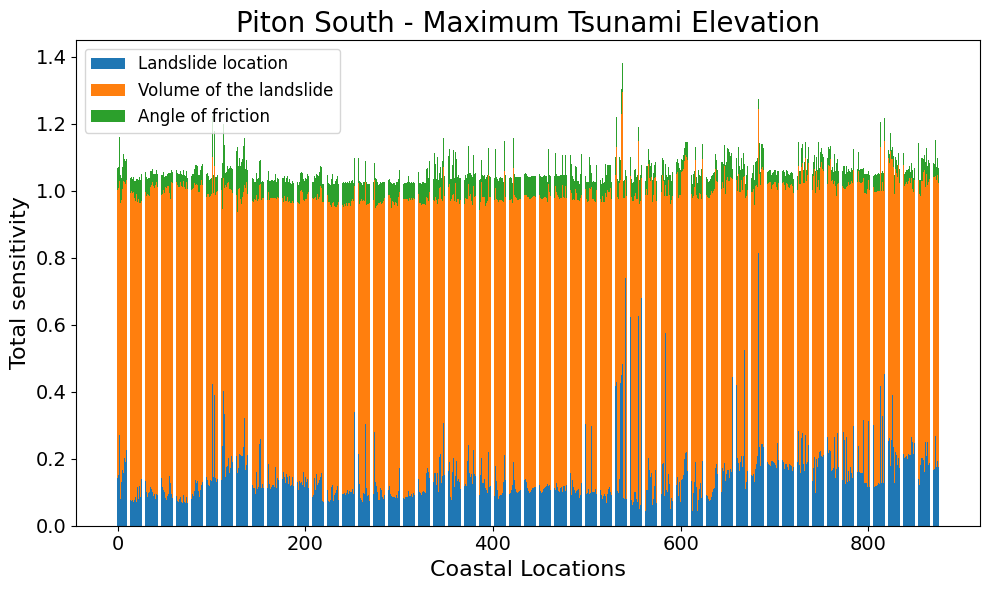

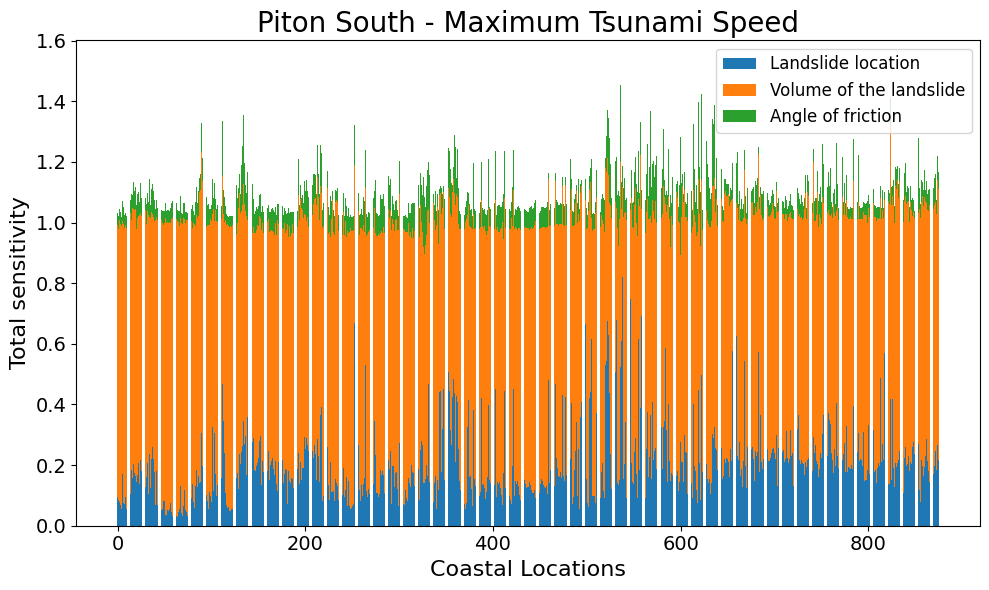

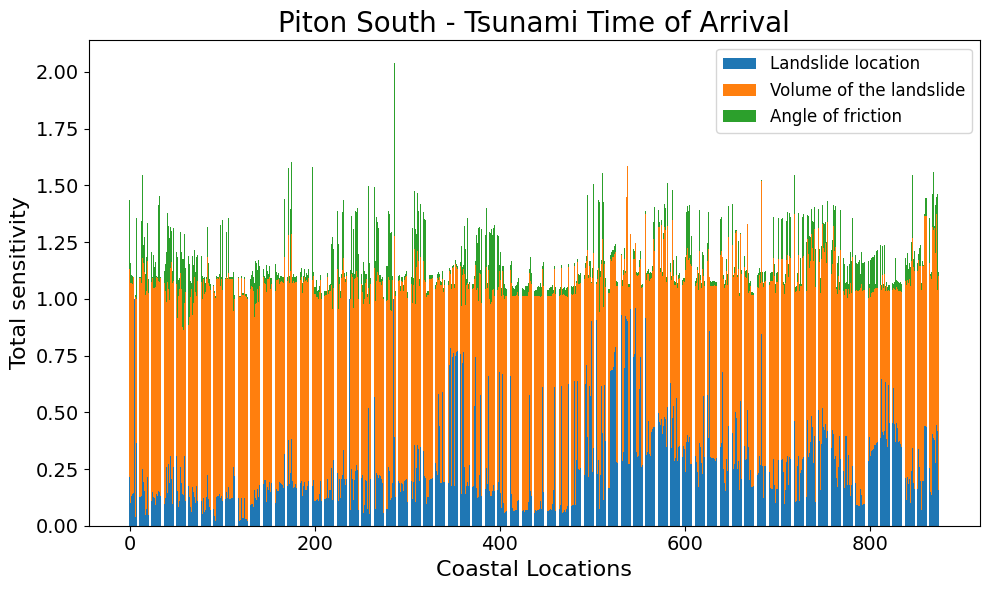

-------------------------------------------------------------------------------
-------------------------------------------------------------------------------


In [38]:
"""
Visualization of the total sensitivities
"""

import numpy as np
import scipy.io
import matplotlib.pyplot as plt

"""
Definition of the common plotting function
"""

def plot_stacked(ST, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    bottom = np.zeros(ST.shape[0])    
    # For each variable, stack its bar segment
    for i in range(ST.shape[1]):
        ax.bar(locations, ST[:, i], bottom=bottom, label=labels[i])
        bottom += ST[:, i]    
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Coastal Locations', fontsize=16)
    ax.set_ylabel('Total sensitivity', fontsize=16)
    ax.legend(fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.tight_layout()
    plt.show()

"""
Performance of the surrogate models for Piton South 
"""

print("-------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------")

# load the necessary data
sensi = scipy.io.loadmat('results/Piton_South_sensi.mat')['sensi']
ST_Zeta = np.array(sensi[0][0]['ST_Zeta'][0][0])
ST_Velo = np.array(sensi[0][0]['ST_Velo'][0][0])
ST_Time = np.array(sensi[0][0]['ST_Time'][0][0])
locations = np.arange(ST_Zeta.shape[0])
labels = ['Landslide location', 'Volume of the landslide', 'Angle of friction']

# Plot the three figures
plot_stacked(ST_Zeta, 'Piton South - Maximum Tsunami Elevation')
plot_stacked(ST_Velo, 'Piton South - Maximum Tsunami Speed')
plot_stacked(ST_Time, 'Piton South - Tsunami Time of Arrival')

print("-------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------")

#***********************************************
# complete the code for Piton North and Offshore
#***********************************************
